In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline
import matplotlib.pyplot as pl
pl.ion()
import numpy as np
import sys
sys.path.append('../')

import os
import copy
from qiskit import *
from qiskit_utilities.utilities import *

from qiskit.visualization import plot_histogram

from newbeginning import *

In [2]:
backend = Aer.get_backend('statevector_simulator')

In [3]:
FR = np.array([[1,1, 0],
              [1,0, 1]])
CR=np.array([1,1,1])
# CR=np.random.rand(4)

# Normalize weights
CR = CR/np.max(CR)

In [38]:
zero=np.array([[1],[0]])
one=np.array([[0],[1]])
zze = np.kron(zero,np.kron(zero,one))
eez = np.kron(one,np.kron(one,zero))
eze = np.kron(one,np.kron(zero,one))
zze.flatten(), eez.flatten(), eze.flatten()

(array([0, 1, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 1, 0, 0]))

In [5]:
# eeo=np.array([[0],
#         [0],
#         [0],
#         [0],
#         [0],
#         [0],
#         [1],
#         [0]],dtype=complex)
# ooe=np.array([[0],
#         [1],
#         [0],
#         [0],
#         [0],
#         [0],
#         [0],
#         [0]],dtype=complex)
# eoe=np.array([[0],
#         [0],
#         [1],
#         [0],
#         [0],
#         [0],
#         [0],
#         [0]],dtype=complex)

In [6]:
sv=1./np.sqrt(2)*(zze+eez).flatten()
mixers=[Mixer('001<->110', np.array((2,1,0)))]

1.4999999999999996


┌──────────────────────────────────────────┐ ░  ░ ┌───────┐ ░  ░ ┌───┐»
q_0: ┤0                                         ├─░──░─┤ Rz(0) ├─░──░─┤ H ├»
     │                                          │ ░  ░ ├───────┤ ░  ░ ├───┤»
q_1: ┤1 Initialize(0,0.70711,0,0,0,0,0.70711,0) ├─░──░─┤ Rz(0) ├─░──░─┤ H ├»
     │                                          │ ░  ░ ├───────┤ ░  ░ ├───┤»
q_2: ┤2                                         ├─░──░─┤ Rz(0) ├─░──░─┤ H ├»
     └──────────────────────────────────────────┘ ░  ░ └───────┘ ░  ░ └───┘»
«          ┌───┐┌───────┐┌───┐┌───┐      ░ ┌───┐┌───┐     ┌───┐┌───────┐┌───┐»
«q_0: ─────┤ X ├┤ Rz(0) ├┤ X ├┤ H ├──────░─┤ S ├┤ H ├─────┤ X ├┤ Rz(0) ├┤ X ├»
«     ┌───┐└─┬─┘└───────┘└─┬─┘├───┤┌───┐ ░ ├───┤├───┤┌───┐└─┬─┘└───────┘└─┬─┘»
«q_1: ┤ X ├──■─────────────■──┤ X ├┤ H ├─░─┤ S ├┤ H ├┤ X ├──■─────────────■──»
«     └─┬─┘                   └─┬─┘├───┤ ░ ├───┤└───┘└─┬─┘                   »
«q_2: ──■───────────────────────■──┤ H ├─░─┤ H ├───────■─────────────────────»
«                                  └───┘ ░ └───┘                             »
«     ┌───┐┌─────┐        ░ ┌───┐┌───┐     ┌───┐┌───────┐┌───┐┌───┐┌─────┐»
«q_0: ┤ H ├┤ Sdg ├────────░─┤ S ├┤ H ├─────┤ X ├┤ Rz(0) ├┤ X ├┤ H ├┤ Sdg ├»
«     ├───┤└┬───┬┘┌─────┐ ░ ├───┤└───┘┌───┐└─┬─┘└───────┘└─┬─┘├───┤└┬───┬┘»
«q_1: ┤ X ├─┤ H ├─┤ Sdg ├─░─┤ H ├─────┤ X ├──■─────────────■──┤ X ├─┤ H ├─»
«     └─┬─┘ ├───┤ └─────┘ ░ ├───┤┌───┐└─┬─┘                   └─┬─┘ ├───┤ »
«q_2: ──■───┤ H ├─────────░─┤ S ├┤ H ├──■───────────────────────■───┤ H ├─»
«           └───┘         ░ └───┘└───┘                              └───┘ »
«             ░ ┌───┐          ┌───┐┌───────┐┌───┐┌───┐             ░  ░ 
«q_0: ────────░─┤ H ├──────────┤ X ├┤ Rz(0) ├┤ X ├┤ H ├─────────────░──░─
«             ░ ├───┤┌───┐┌───┐└─┬─┘└───────┘└─┬─┘├───┤┌───┐┌─────┐ ░  ░ 
«q_1: ────────░─┤ S ├┤ H ├┤ X ├──■─────────────■──┤ X ├┤ H ├┤ Sdg ├─░──░─
«     ┌─────┐ ░ ├───┤├───┤└─┬─┘                   └─┬─┘├───┤├─────┤ ░  ░ 
«q_2: ┤ Sdg ├─░─┤ S ├┤ H ├──■───────────────────────■──┤ H ├┤ Sdg ├─░──░─
«     └─────┘ ░ └───┘└───┘                             └───┘└─────┘ ░  ░

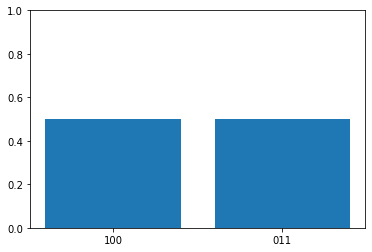

In [7]:
qaoa=QAOAChoose(CR, FR)
val, qc, job = qaoa.evaluate(np.array((0,0)), backend, mu=0, useExco=[False],sv=sv,mixers=mixers,barrier=True)

print(val)

# plot histogram
md=job.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])


qc.draw()

Optimization terminated successfully.
         Current function value: 1.000002
         Iterations: 15
         Function evaluations: 29


(0.0, 1.0)

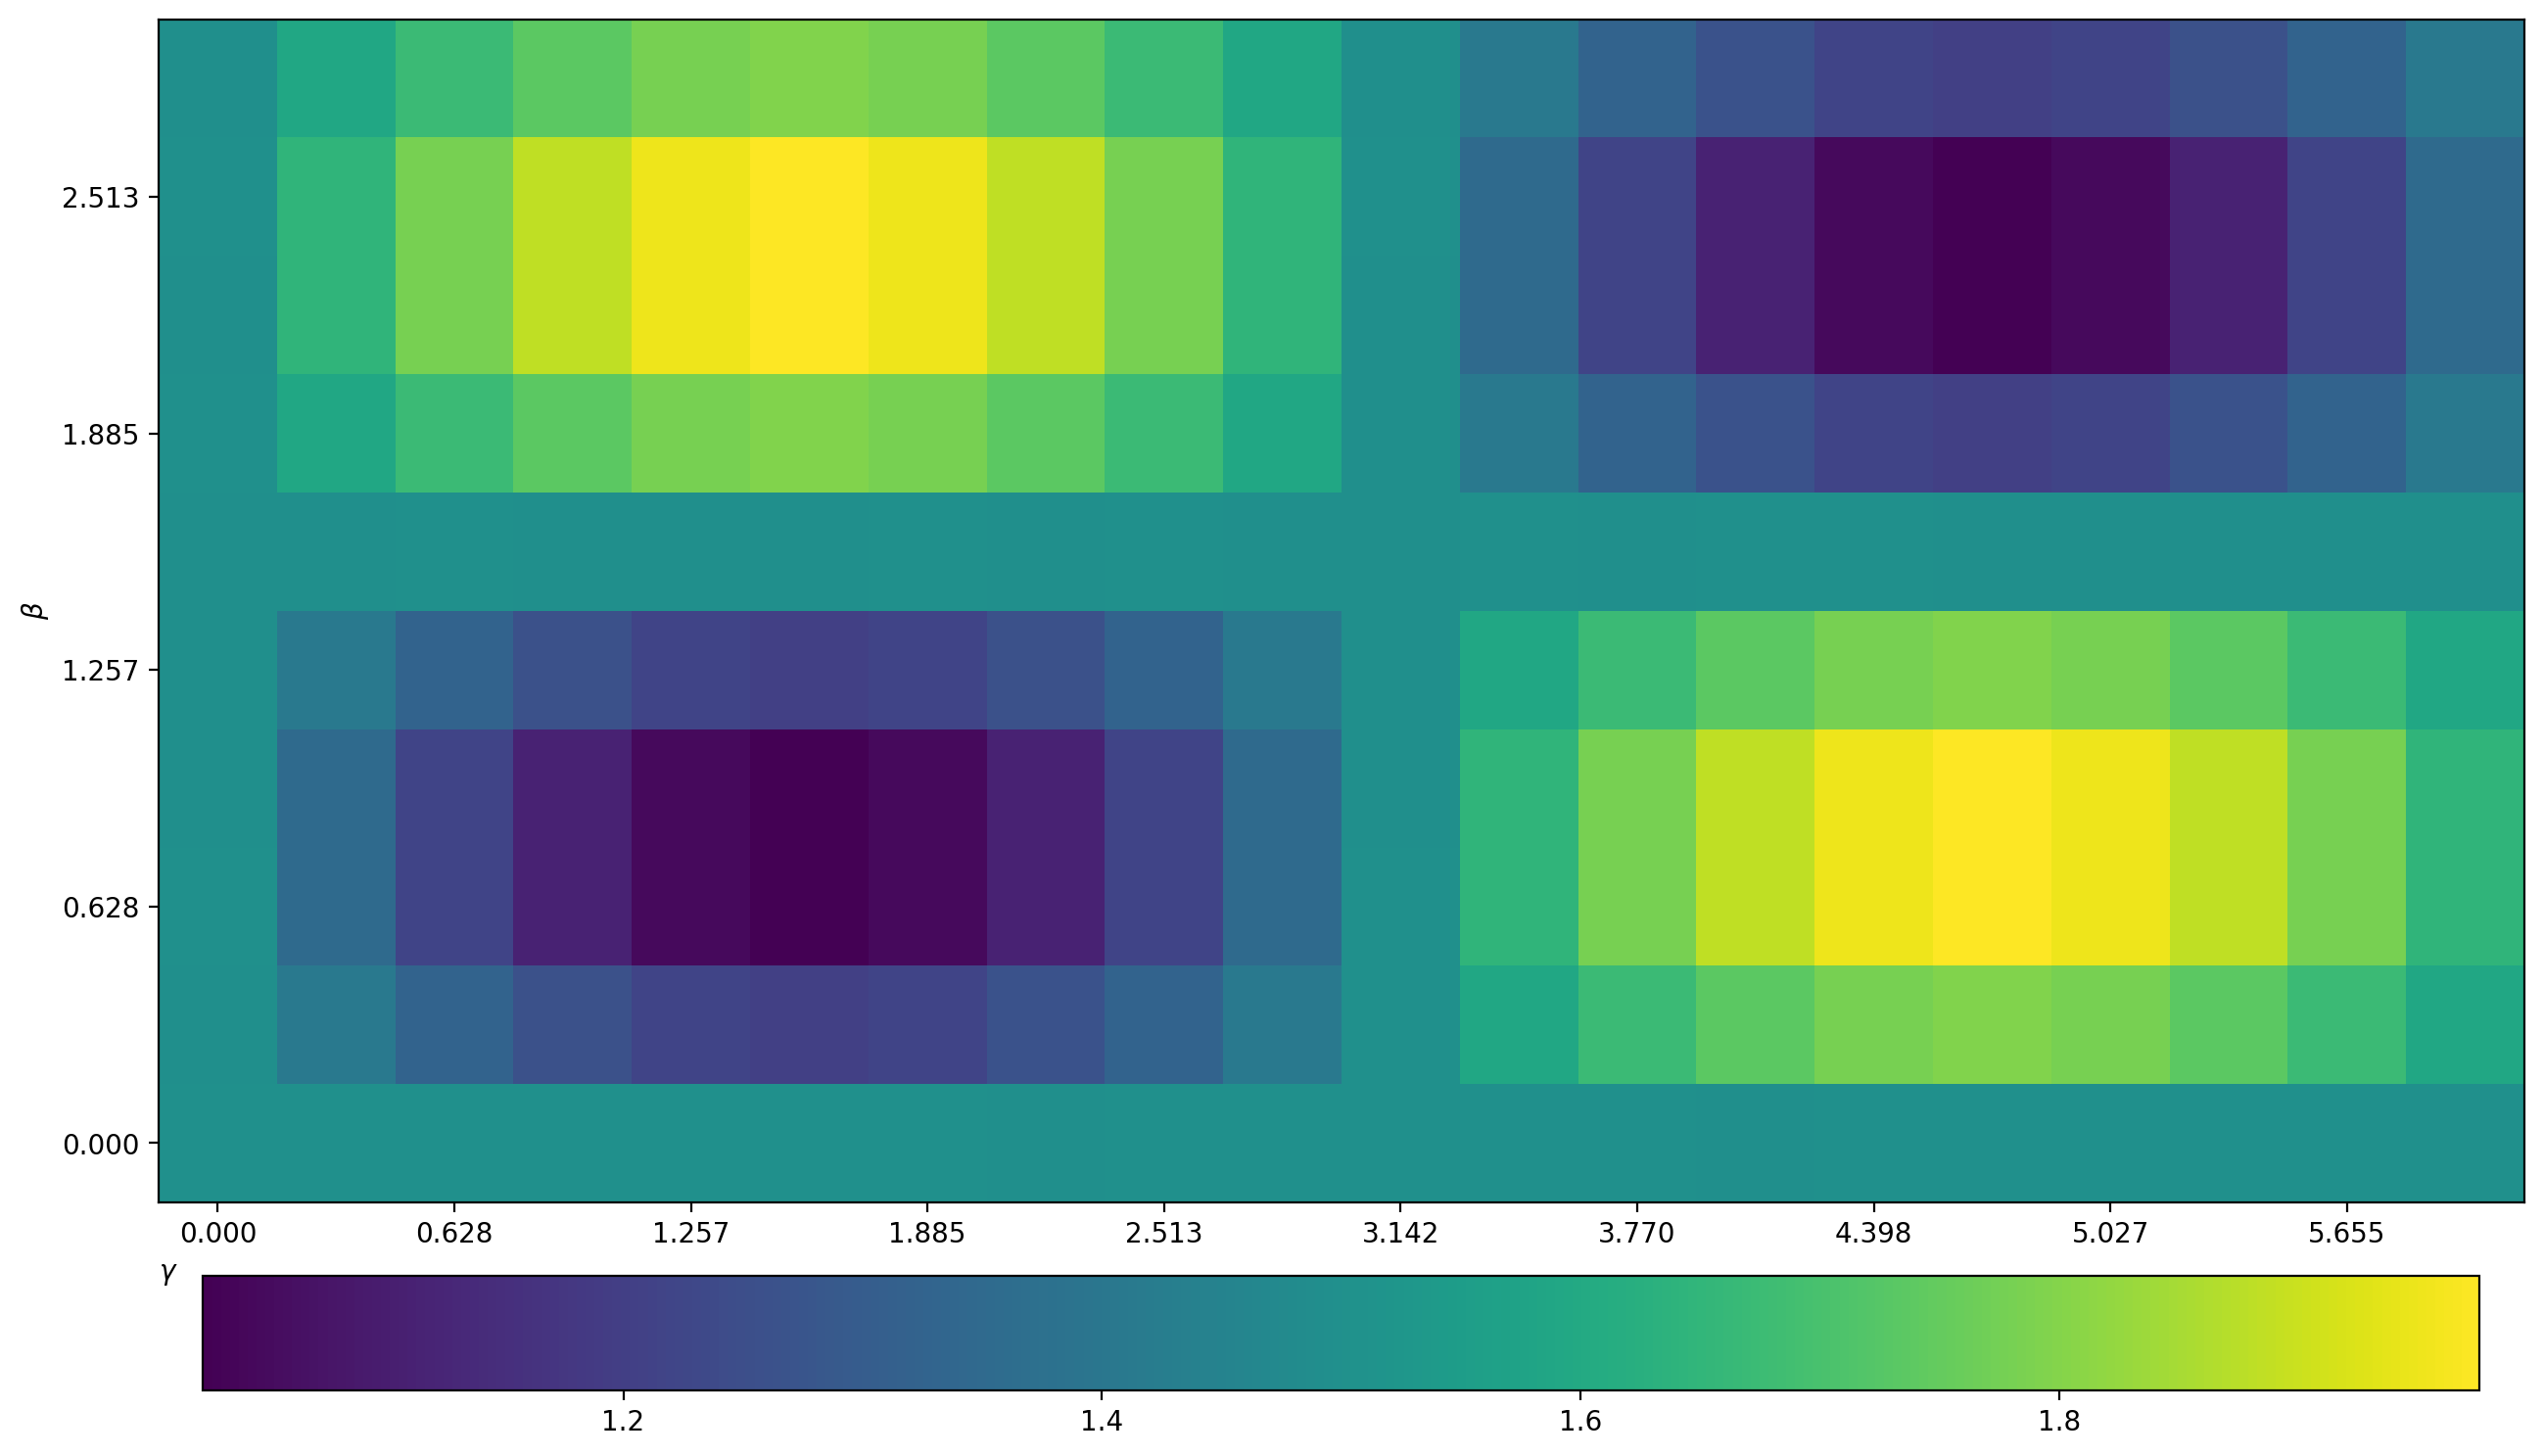

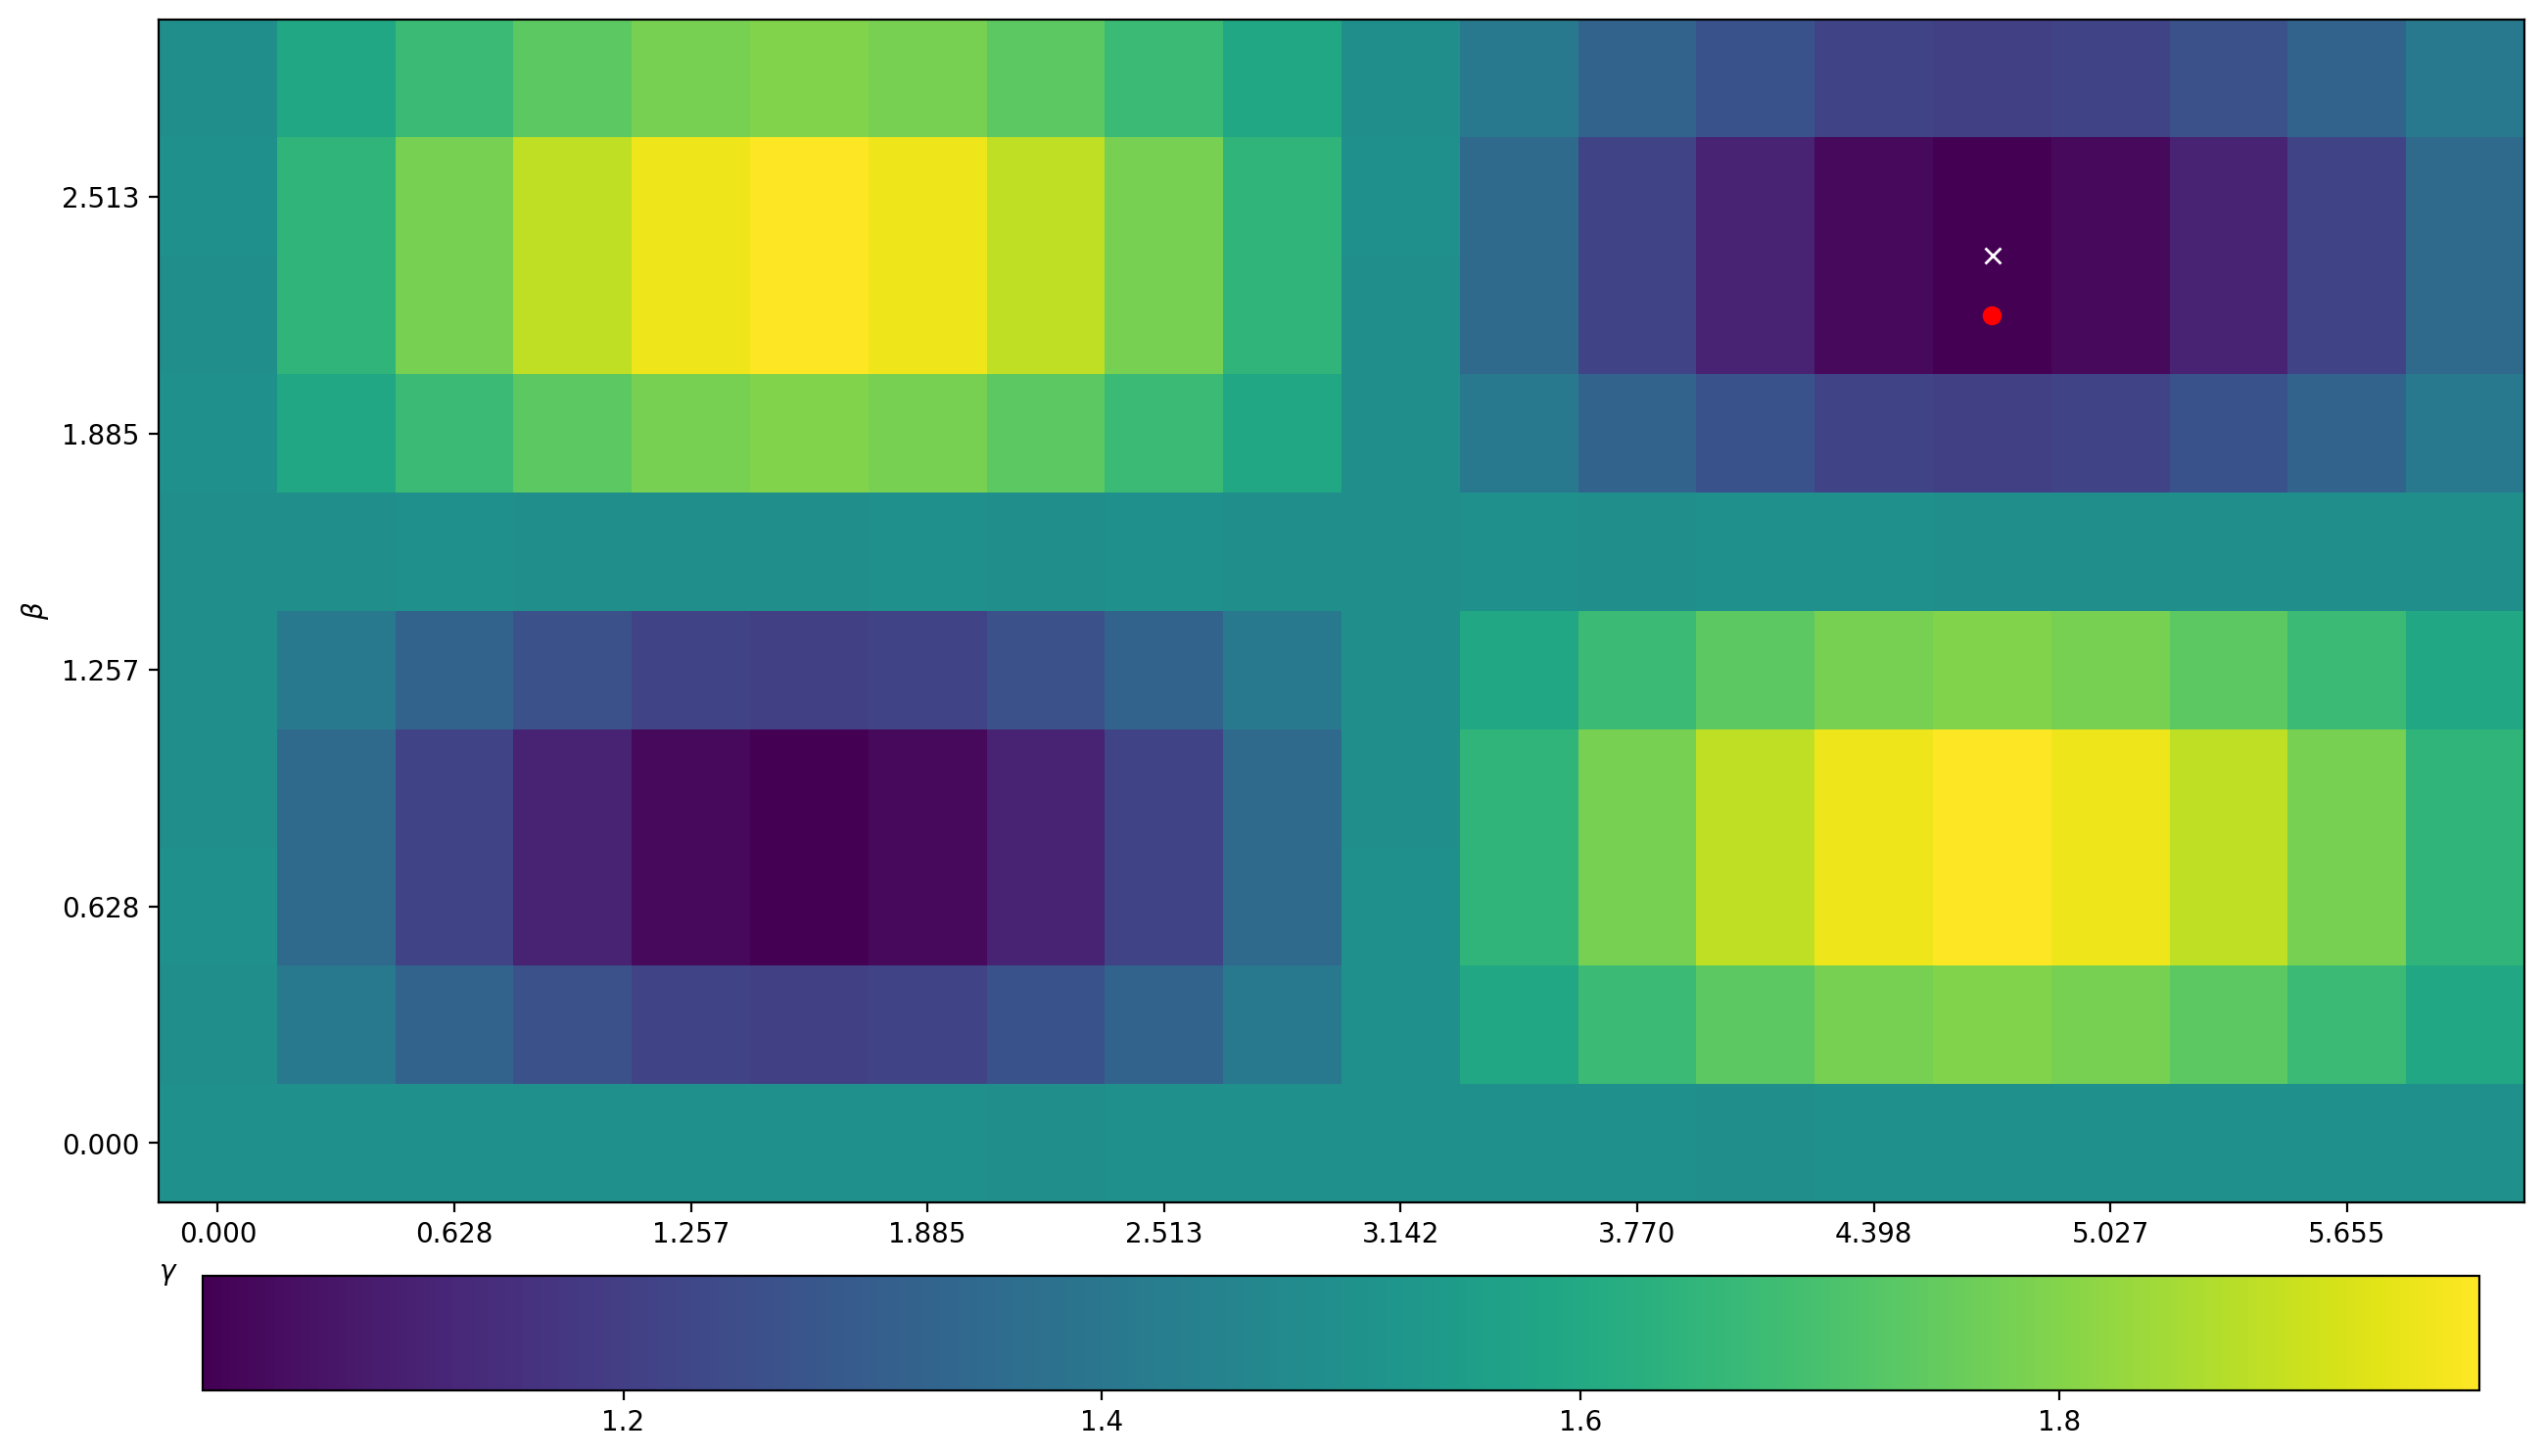

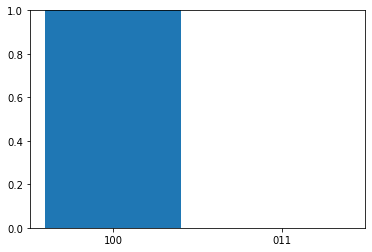

In [8]:
qaoa=QAOAChoose(CR, FR)

mu=0

E, Ecost, Eexco, x0, job, ji = qaoa.getElandscape(backend,mu,useExco=[False],sv=sv,mixers=mixers,ng=20,nb=10)
out, job_b, xb = qaoa.getlocalmin(x0, backend, mu,useExco=[False],sv=sv, mixers=mixers)

# plot landscape
_=getfig(Ecost,ng=20,nb=10)
# plot landscape
_=getfig(E,ng=20,nb=10)
pl.plot(x0[0],x0[1],'ro')
pl.plot(xb[0],xb[1],'wx')

# plot histogram
md=job_b.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])

In [23]:
FR = np.array([[1,1, 0],
              [1,0, 1]])
CR=np.array([2,1,2])
# CR=np.random.rand(4)

# Normalize weights
CR = CR/np.max(CR)

In [49]:
sv=1./np.sqrt(2)*(eez+eze).flatten()
mixers=[Mixer('01<->10', np.array((1,0)))]

1.6249999999999996


┌──────────────────────────────────────────┐ ░  ░ ┌───────┐ ░   ┌───┐  »
q_0: ┤0                                         ├─░──░─┤ Rz(0) ├─░───┤ H ├──»
     │                                          │ ░  ░ ├───────┤ ░   ├───┤  »
q_1: ┤1 Initialize(0,0,0,0,0,0.70711,0.70711,0) ├─░──░─┤ Rz(0) ├─░───┤ H ├──»
     │                                          │ ░  ░ ├───────┤ ░ ┌─┴───┴─┐»
q_2: ┤2                                         ├─░──░─┤ Rz(0) ├─░─┤ U1(0) ├»
     └──────────────────────────────────────────┘ ░  ░ └───────┘ ░ └───────┘»
«     ┌───┐┌───────┐┌───┐┌───┐ ░ ┌───┐┌───┐┌───┐┌───────┐┌───┐┌───┐┌─────┐ ░ »
«q_0: ┤ X ├┤ Rz(0) ├┤ X ├┤ H ├─░─┤ S ├┤ H ├┤ X ├┤ Rz(0) ├┤ X ├┤ H ├┤ Sdg ├─░─»
«     └─┬─┘└───────┘└─┬─┘├───┤ ░ ├───┤├───┤└─┬─┘└───────┘└─┬─┘├───┤├─────┤ ░ »
«q_1: ──■─────────────■──┤ H ├─░─┤ S ├┤ H ├──■─────────────■──┤ H ├┤ Sdg ├─░─»
«                        └───┘ ░ └───┘└───┘                   └───┘└─────┘ ░ »
«q_2: ─────────────────────────░───────────────────────────────────────────░─»
«                              ░                                           ░ »
«      ░ 
«q_0: ─░─
«      ░ 
«q_1: ─░─
«      ░ 
«q_2: ─░─
«      ░

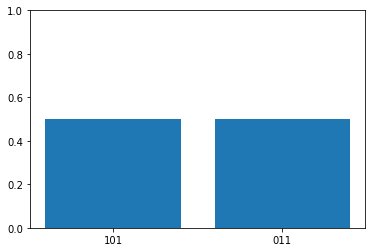

In [50]:
qaoa=QAOAChoose(CR, FR)
val, qc, job = qaoa.evaluate(np.array((0,0)), backend, mu=0, useExco=[False],sv=sv,mixers=mixers,barrier=True)

print(val)

# plot histogram
md=job.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])


qc.draw()

Optimization terminated successfully.
         Current function value: 1.250001
         Iterations: 16
         Function evaluations: 29


(0.0, 1.0)

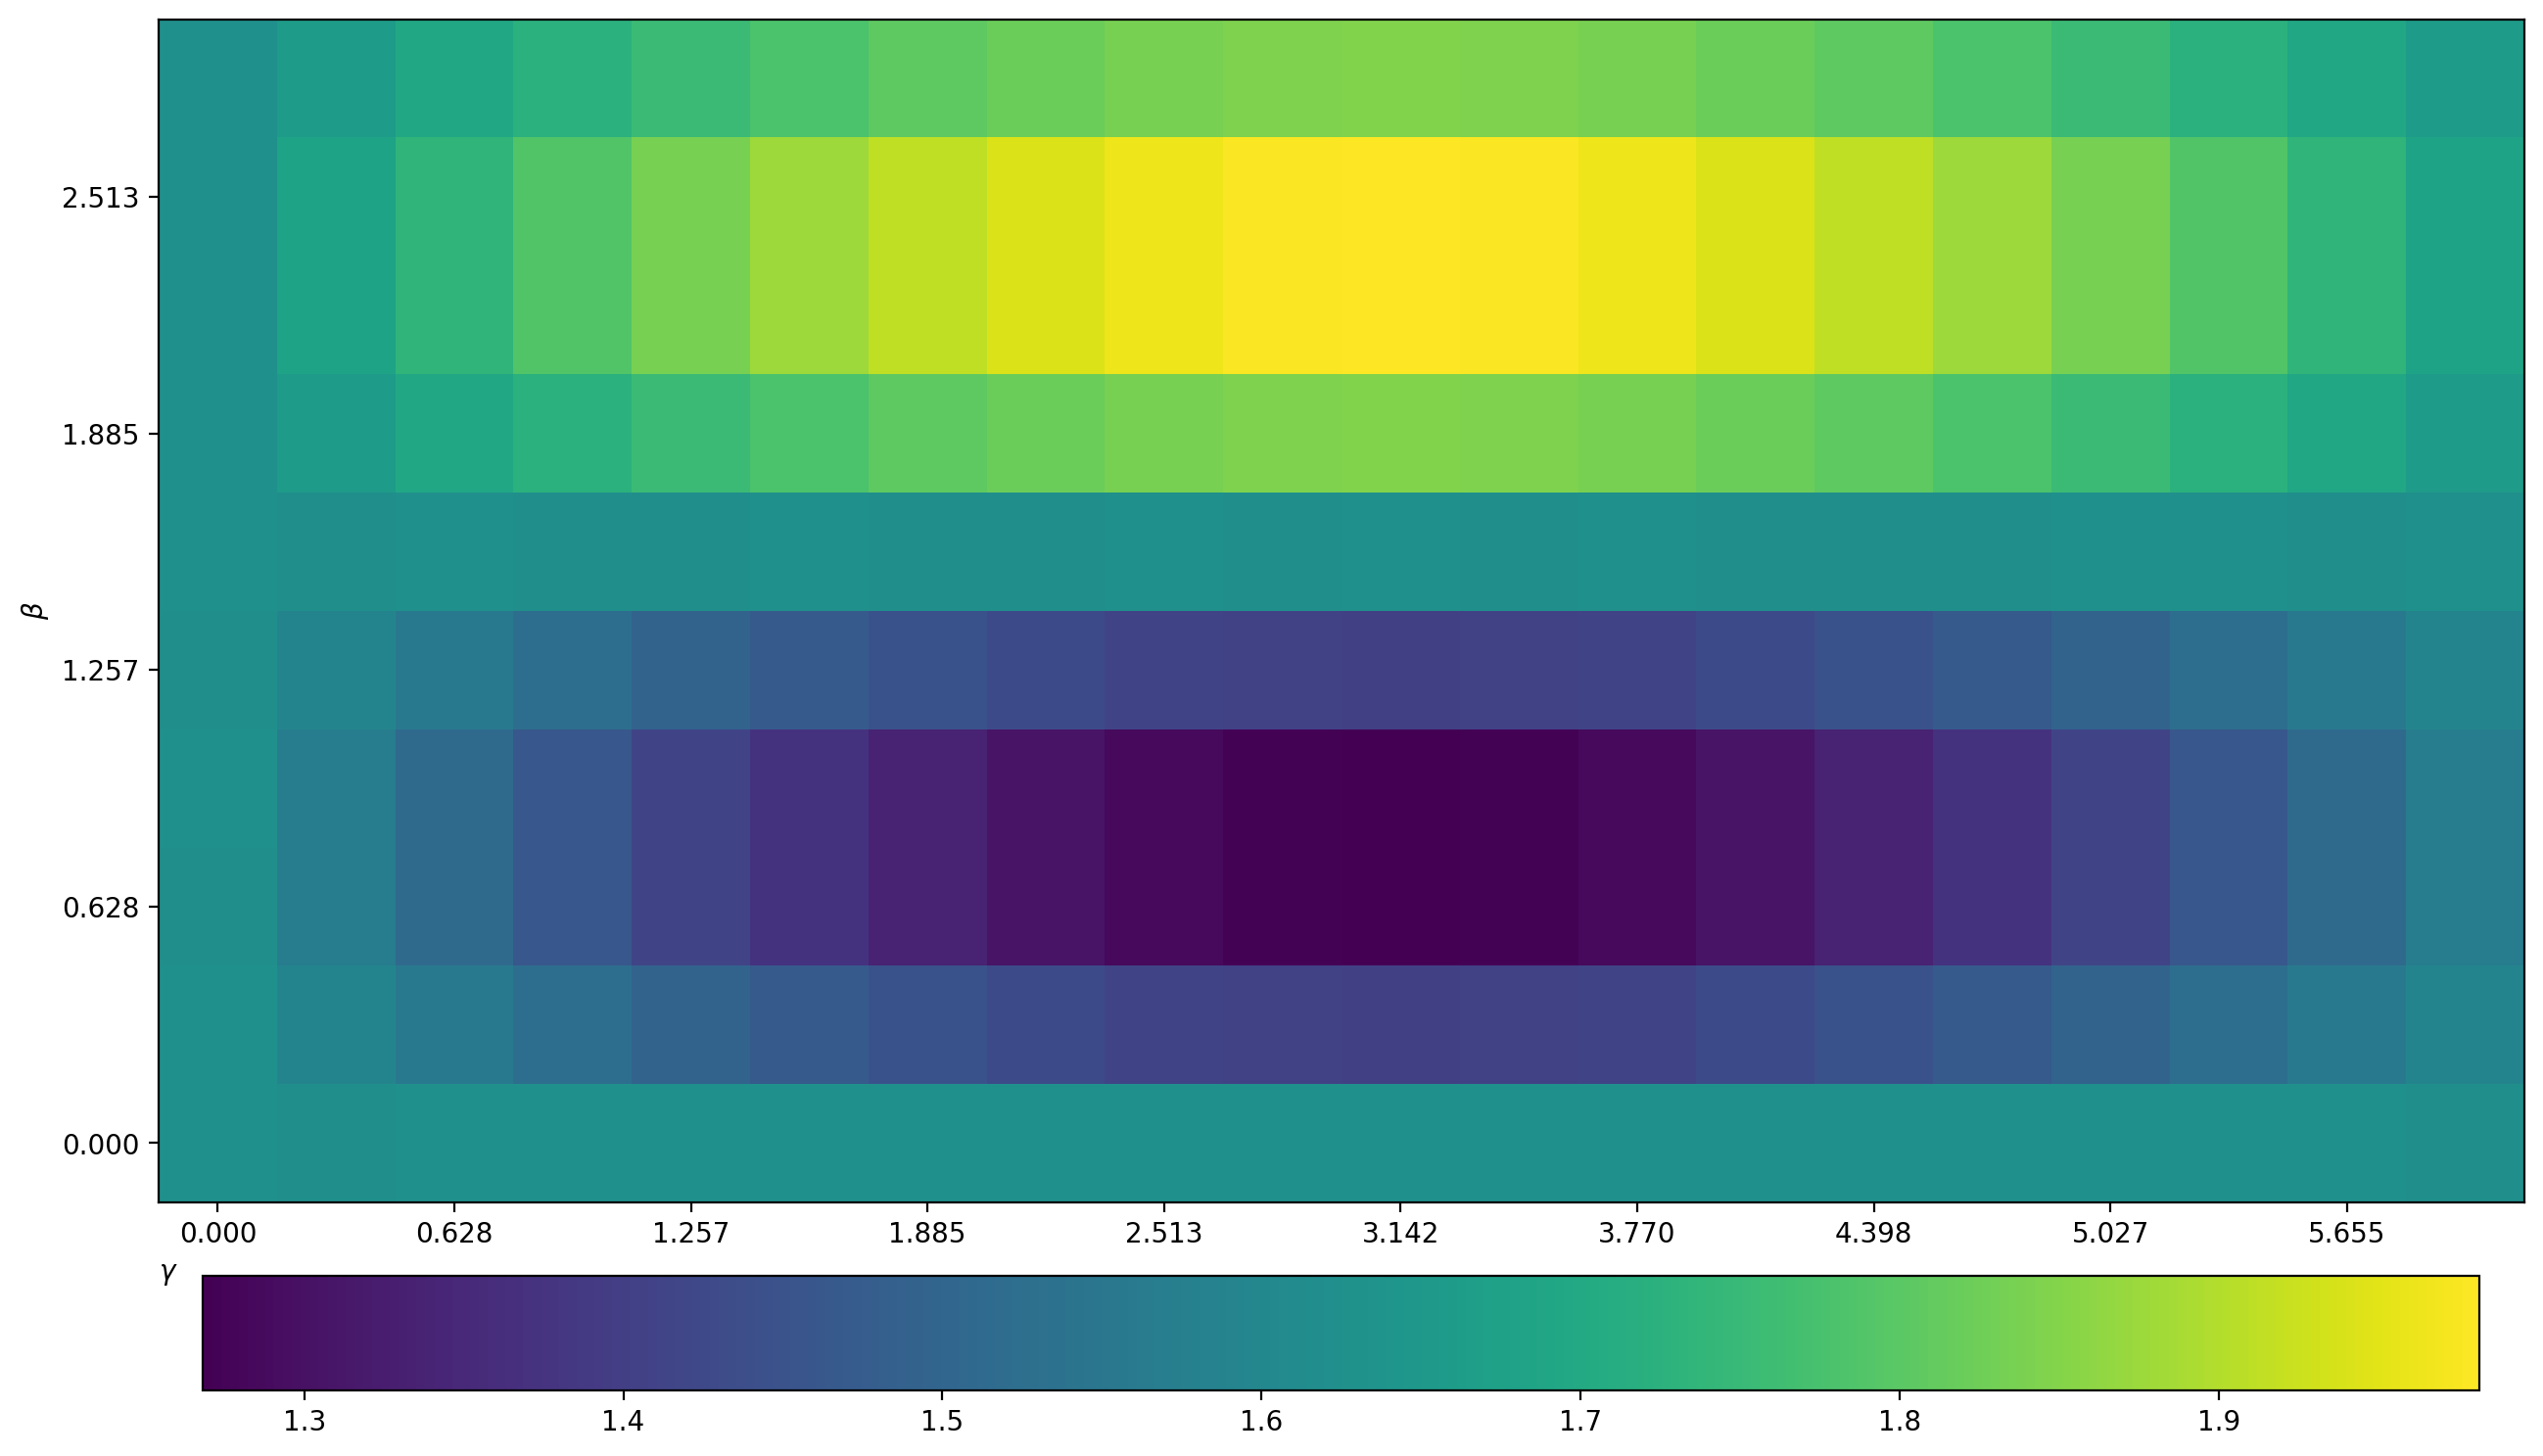

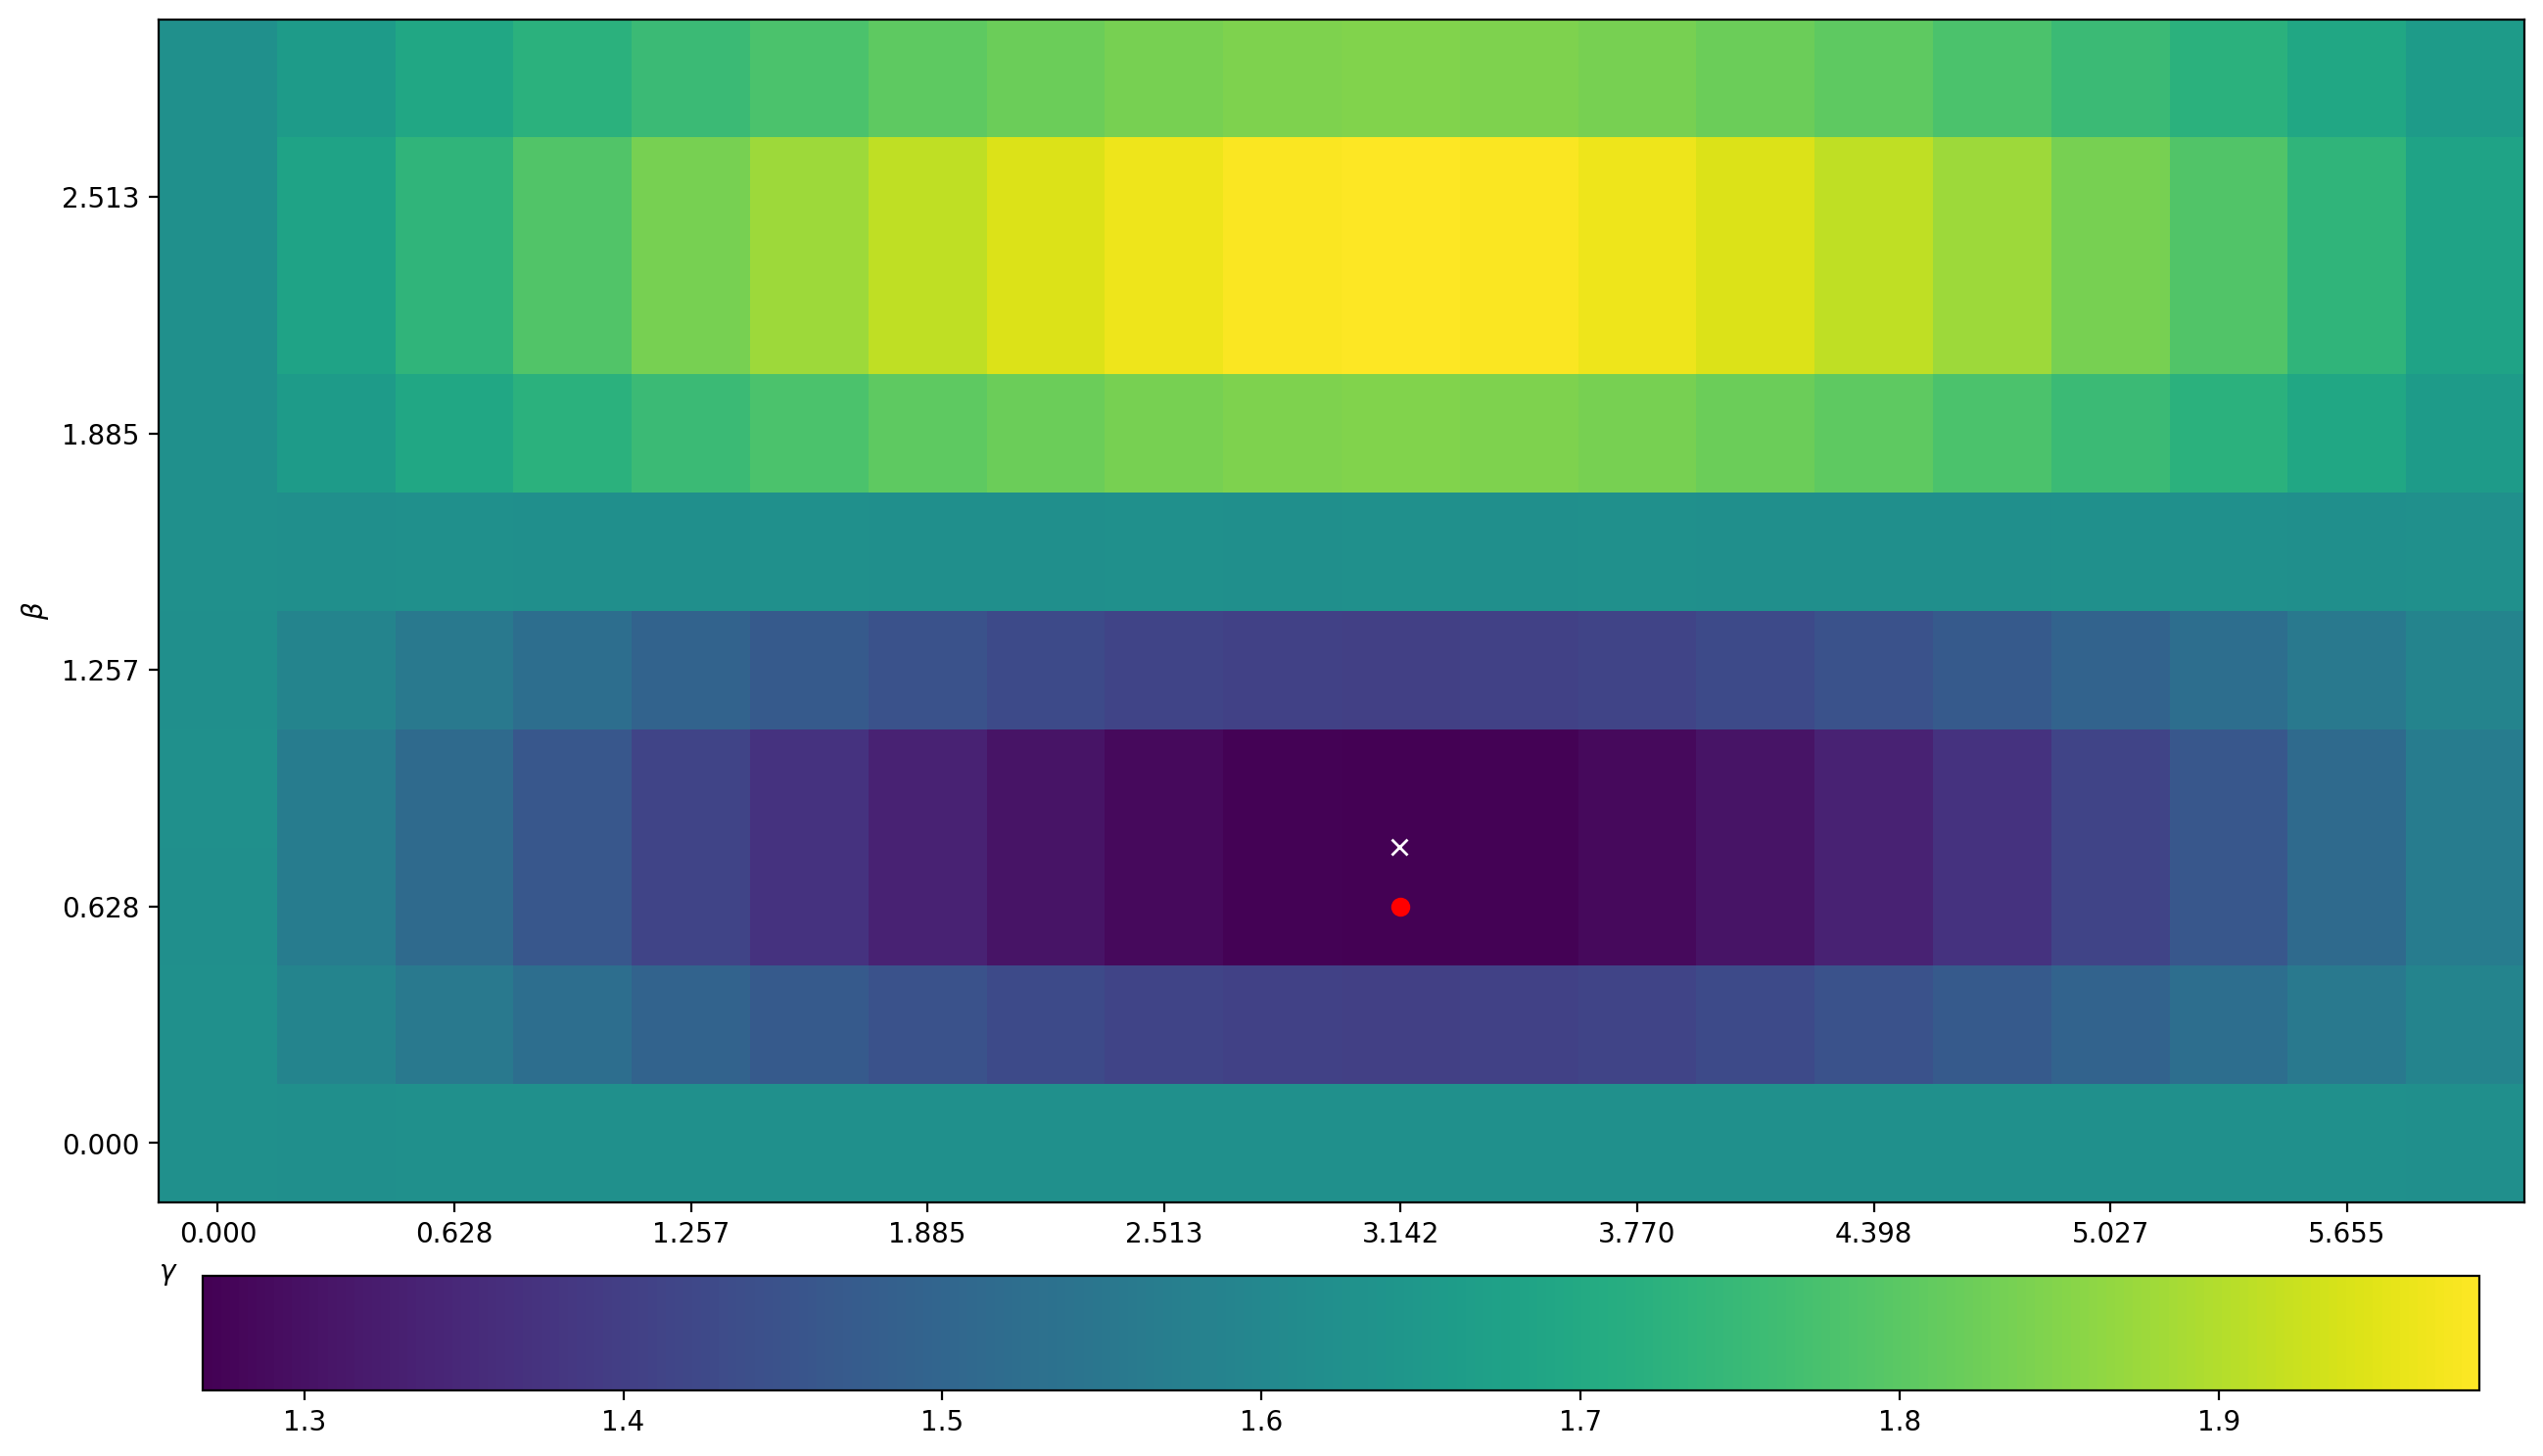

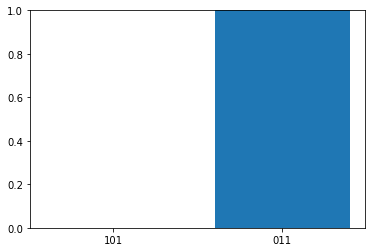

In [51]:
qaoa=QAOAChoose(CR, FR)

mu=0

E, Ecost, Eexco, x0, job, ji = qaoa.getElandscape(backend,mu,useExco=[False],sv=sv,mixers=mixers,ng=20,nb=10)
out, job_b, xb = qaoa.getlocalmin(x0, backend, mu,useExco=[False],sv=sv, mixers=mixers)

# plot landscape
_=getfig(Ecost,ng=20,nb=10)
# plot landscape
_=getfig(E,ng=20,nb=10)
pl.plot(x0[0],x0[1],'ro')
pl.plot(xb[0],xb[1],'wx')

# plot histogram
md=job_b.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])

In [13]:
FR = np.array([[1,1, 0],
              [1,0, 1]])
CR=np.array([2,1,2])
# CR=np.random.rand(4)

# Normalize weights
CR = CR/np.max(CR)

In [14]:
sv=1./np.sqrt(2)*(eze+zze).flatten()
mixers=[Mixer('0<->1', np.array((2)))]

1.4999999999999996


┌──────────────────────────────────────────┐ ░  ░ ┌───────┐ ░           ░ »
q_0: ┤0                                         ├─░──░─┤ Rz(0) ├─░───────────░─»
     │                                          │ ░  ░ ├───────┤ ░           ░ »
q_1: ┤1 Initialize(0,0.70711,0,0,0,0.70711,0,0) ├─░──░─┤ Rz(0) ├─░───────────░─»
     │                                          │ ░  ░ ├───────┤ ░ ┌───────┐ ░ »
q_2: ┤2                                         ├─░──░─┤ Rz(0) ├─░─┤ Rx(0) ├─░─»
     └──────────────────────────────────────────┘ ░  ░ └───────┘ ░ └───────┘ ░ »
«      ░ 
«q_0: ─░─
«      ░ 
«q_1: ─░─
«      ░ 
«q_2: ─░─
«      ░

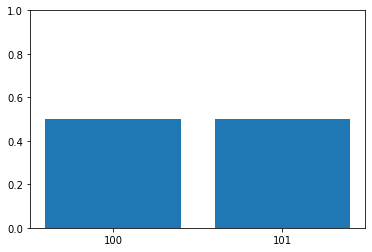

In [15]:
qaoa=QAOAChoose(CR, FR)
val, qc, job = qaoa.evaluate(np.array((0,0)), backend, mu=0, useExco=[False],sv=sv,mixers=mixers,barrier=True)

print(val)

# plot histogram
md=job.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])


qc.draw()

Optimization terminated successfully.
         Current function value: 1.000003
         Iterations: 12
         Function evaluations: 24


(0.0, 1.0)

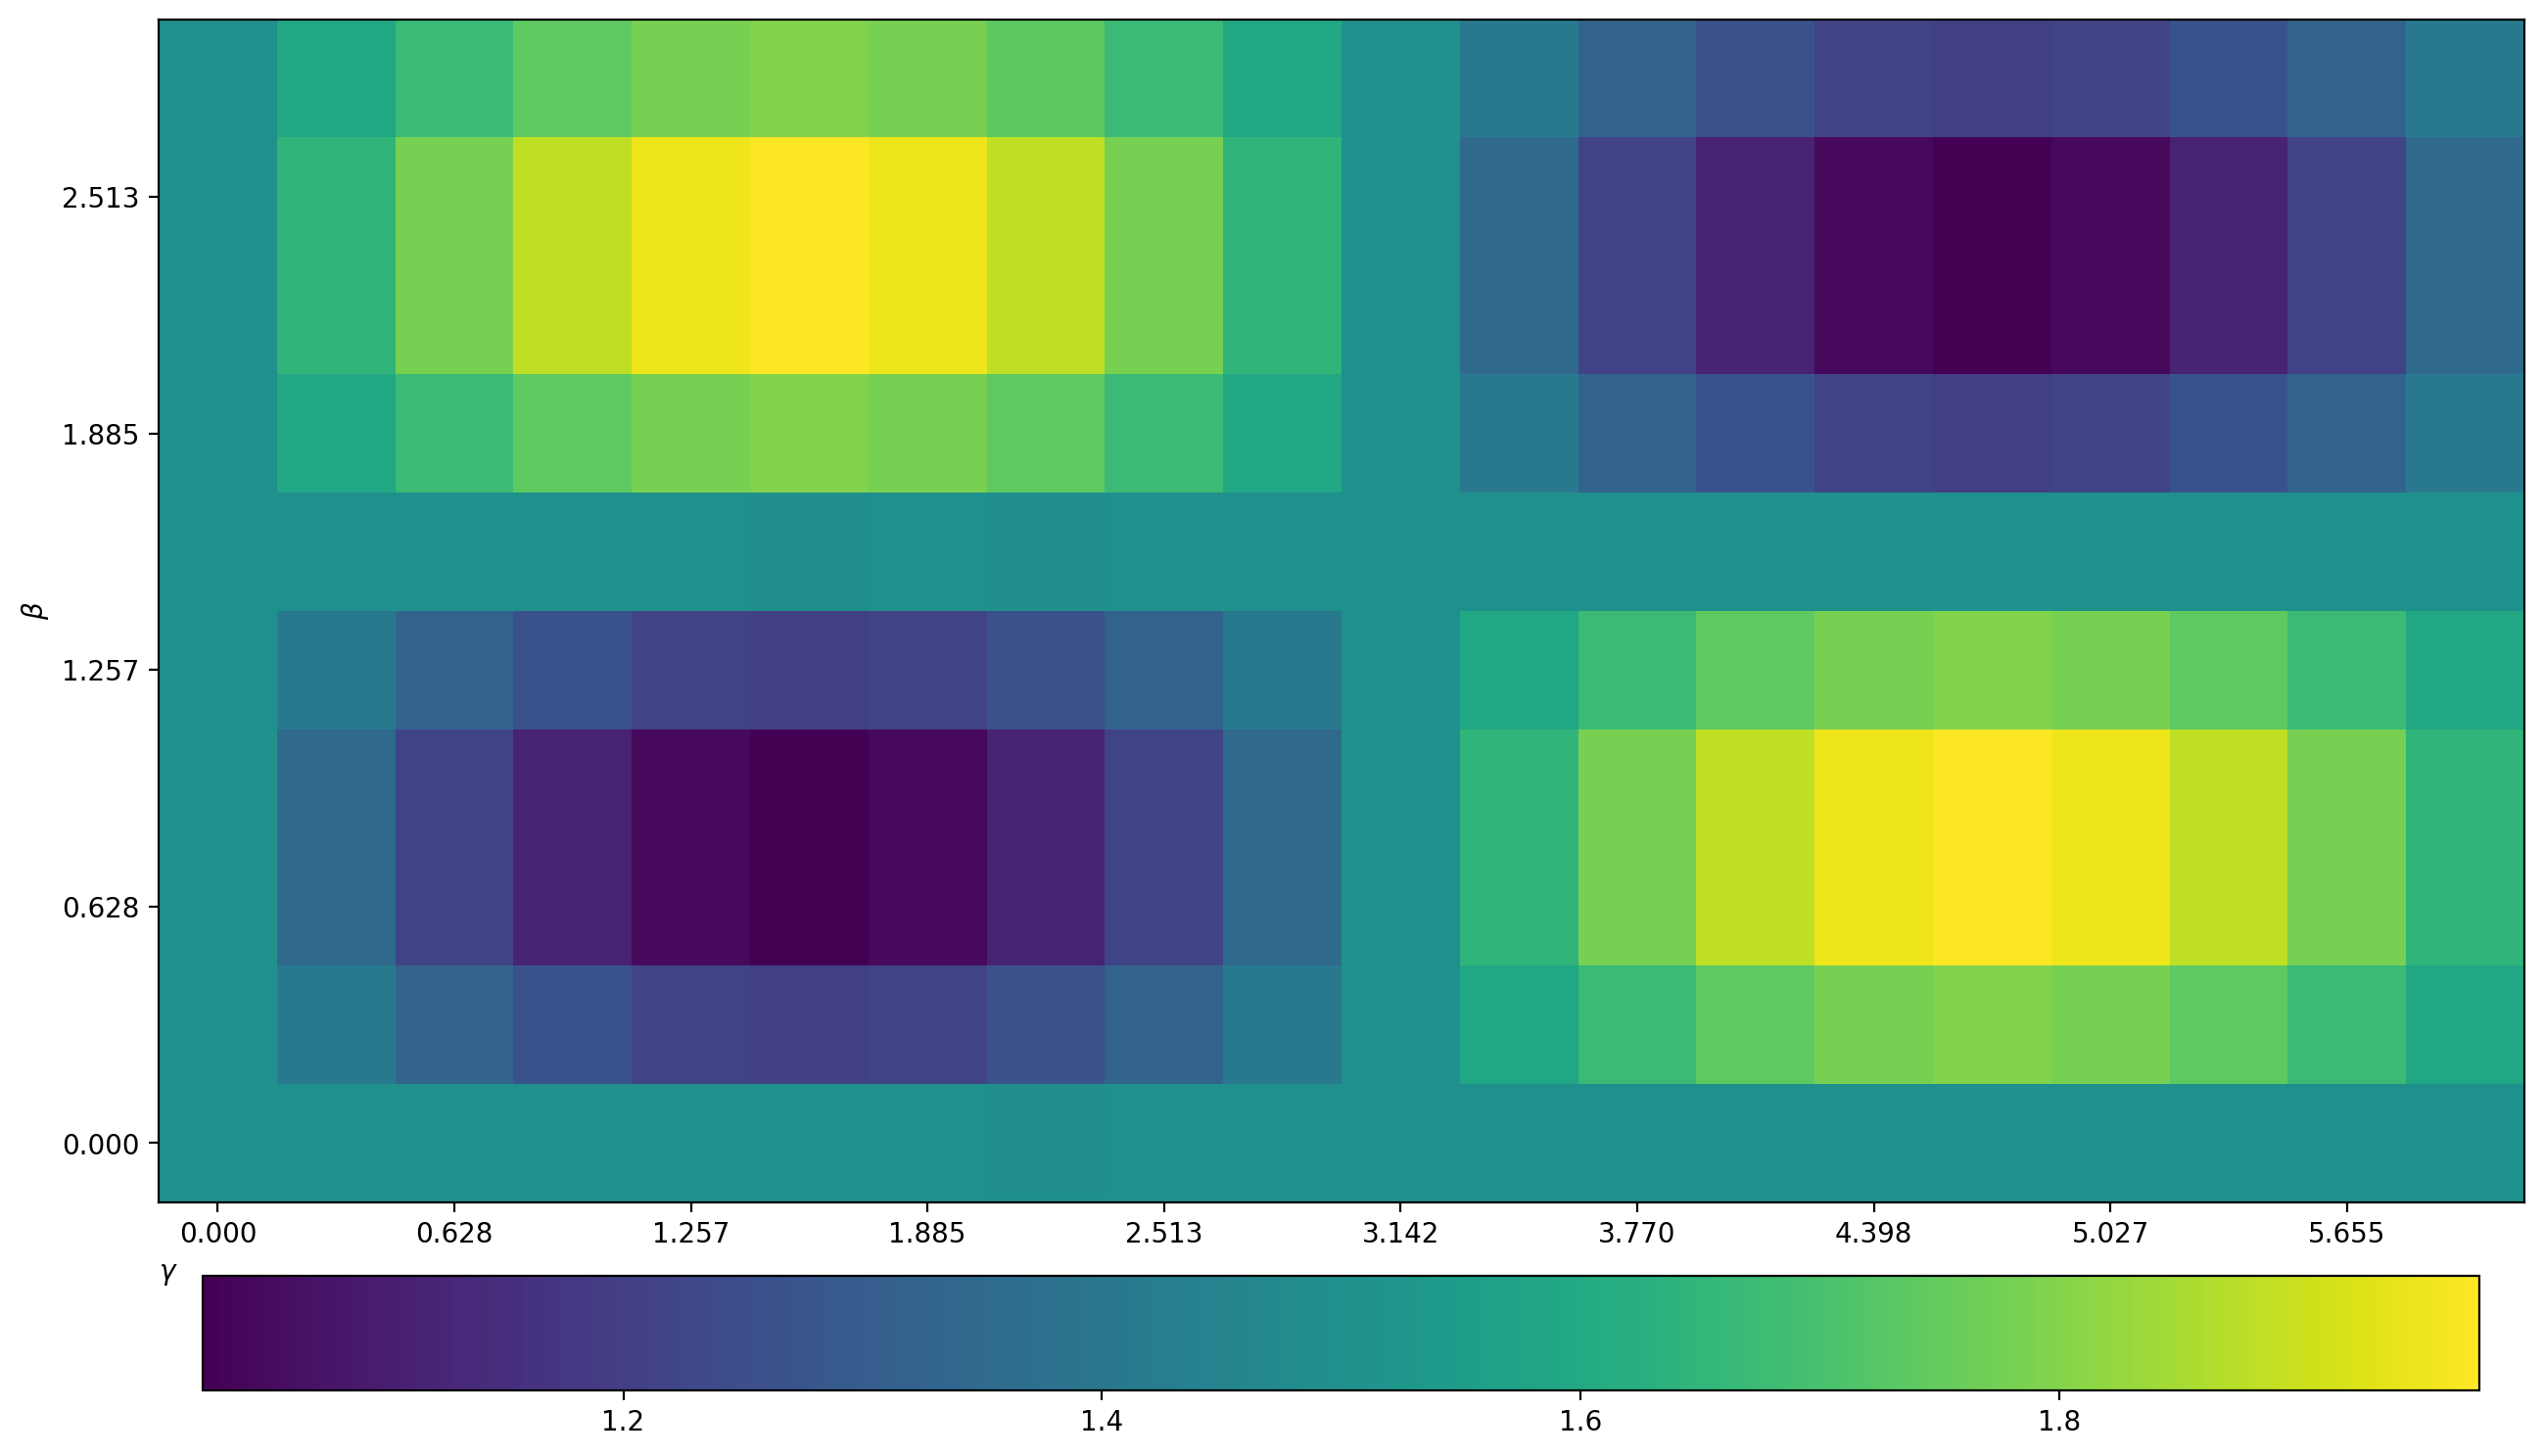

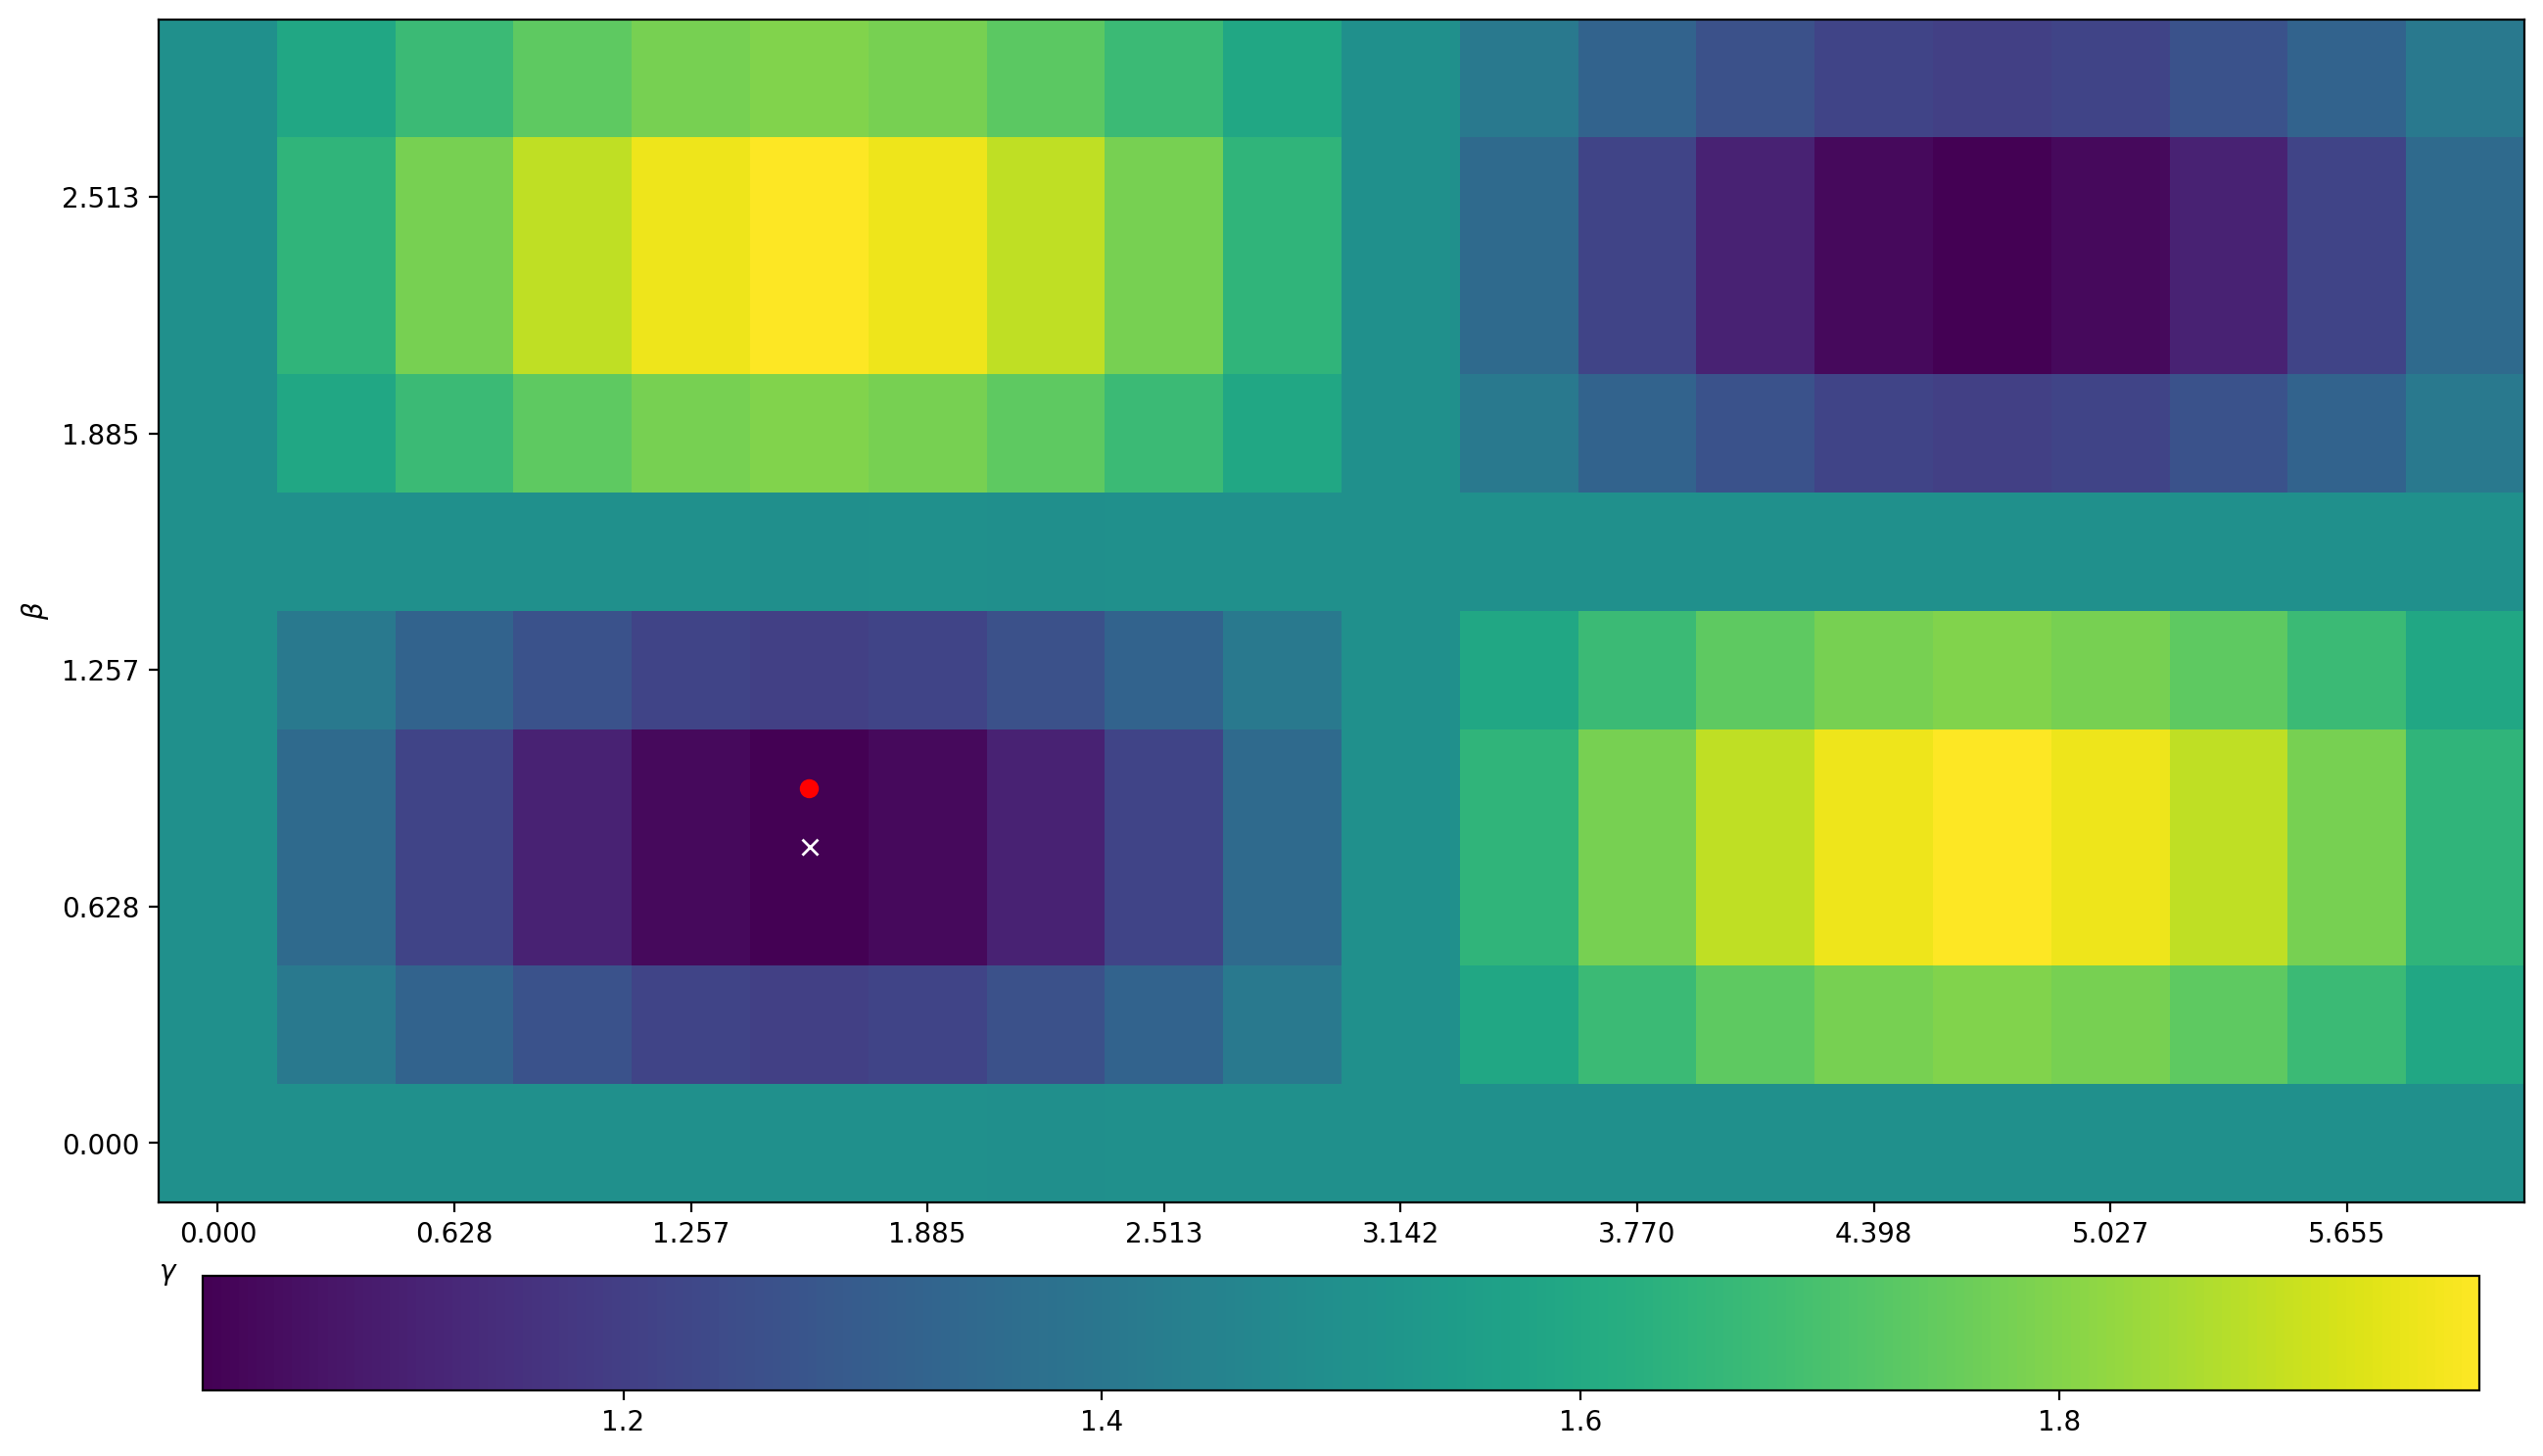

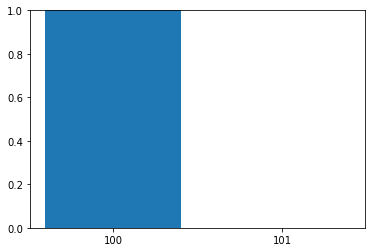

In [16]:
qaoa=QAOAChoose(CR, FR)

mu=0

E, Ecost, Eexco, x0, job, ji = qaoa.getElandscape(backend,mu,useExco=[False],sv=sv,mixers=mixers,ng=20,nb=10)
out, job_b, xb = qaoa.getlocalmin(x0, backend, mu,useExco=[False],sv=sv, mixers=mixers)

# plot landscape
_=getfig(Ecost,ng=20,nb=10)
# plot landscape
_=getfig(E,ng=20,nb=10)
pl.plot(x0[0],x0[1],'ro')
pl.plot(xb[0],xb[1],'wx')

# plot histogram
md=job_b.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])

In [17]:
FR = np.array([[1,1, 0],
              [1,0, 1]])
CR=np.array([2,1,2])
# CR=np.random.rand(4)

# Normalize weights
CR = CR/np.max(CR)

In [18]:
sv=1./np.sqrt(3)*(eez+eze+zze).flatten()
mixers=[Mixer('001<->110', np.array((2,1,0))), Mixer('01<->10', np.array((1,0))), Mixer('0<->1', np.array((2)))]

0.8333333333333328


┌────────────────────────────────────────────────┐ ░  ░ ┌───────┐ ░  ░ »
q_0: ┤0                                               ├─░──░─┤ Rz(0) ├─░──░─»
     │                                                │ ░  ░ ├───────┤ ░  ░ »
q_1: ┤1 Initialize(0,0.57735,0,0,0,0.57735,0.57735,0) ├─░──░─┤ Rz(0) ├─░──░─»
     │                                                │ ░  ░ ├───────┤ ░  ░ »
q_2: ┤2                                               ├─░──░─┤ Rz(0) ├─░──░─»
     └────────────────────────────────────────────────┘ ░  ░ └───────┘ ░  ░ »
«     ┌───┐     ┌───┐┌─────────┐┌───┐┌───┐      ░ ┌───┐┌───┐     ┌───┐»
«q_0: ┤ H ├─────┤ X ├┤ Rz(π/4) ├┤ X ├┤ H ├──────░─┤ S ├┤ H ├─────┤ X ├»
«     ├───┤┌───┐└─┬─┘└─────────┘└─┬─┘├───┤┌───┐ ░ ├───┤├───┤┌───┐└─┬─┘»
«q_1: ┤ H ├┤ X ├──■───────────────■──┤ X ├┤ H ├─░─┤ S ├┤ H ├┤ X ├──■──»
«     ├───┤└─┬─┘                     └─┬─┘├───┤ ░ ├───┤└───┘└─┬─┘     »
«q_2: ┤ H ├──■─────────────────────────■──┤ H ├─░─┤ H ├───────■───────»
«     └───┘                               └───┘ ░ └───┘               »
«     ┌─────────┐┌───┐┌───┐┌─────┐        ░ ┌───┐┌───┐     ┌───┐┌─────────┐»
«q_0: ┤ Rz(π/4) ├┤ X ├┤ H ├┤ Sdg ├────────░─┤ S ├┤ H ├─────┤ X ├┤ Rz(π/4) ├»
«     └─────────┘└─┬─┘├───┤└┬───┬┘┌─────┐ ░ ├───┤└───┘┌───┐└─┬─┘└─────────┘»
«q_1: ─────────────■──┤ X ├─┤ H ├─┤ Sdg ├─░─┤ H ├─────┤ X ├──■─────────────»
«                     └─┬─┘ ├───┤ └─────┘ ░ ├───┤┌───┐└─┬─┘                »
«q_2: ──────────────────■───┤ H ├─────────░─┤ S ├┤ H ├──■──────────────────»
«                           └───┘         ░ └───┘└───┘                     »
«     ┌───┐┌───┐┌─────┐        ░ ┌───┐          ┌───┐┌──────────┐┌───┐┌───┐»
«q_0: ┤ X ├┤ H ├┤ Sdg ├────────░─┤ H ├──────────┤ X ├┤ Rz(-π/4) ├┤ X ├┤ H ├»
«     └─┬─┘├───┤└┬───┬┘        ░ ├───┤┌───┐┌───┐└─┬─┘└──────────┘└─┬─┘├───┤»
«q_1: ──■──┤ X ├─┤ H ├─────────░─┤ S ├┤ H ├┤ X ├──■────────────────■──┤ X ├»
«          └─┬─┘ ├───┤ ┌─────┐ ░ ├───┤├───┤└─┬─┘                      └─┬─┘»
«q_2: ───────■───┤ H ├─┤ Sdg ├─░─┤ S ├┤ H ├──■──────────────────────────■──»
«                └───┘ └─────┘ ░ └───┘└───┘                                »
«                  ░ ┌───┐┌───┐┌─────────┐┌───┐┌───┐ ░ ┌───┐┌───┐┌───┐»
«q_0: ─────────────░─┤ H ├┤ X ├┤ Rz(π/2) ├┤ X ├┤ H ├─░─┤ S ├┤ H ├┤ X ├»
«     ┌───┐┌─────┐ ░ ├───┤└─┬─┘└─────────┘└─┬─┘├───┤ ░ ├───┤├───┤└─┬─┘»
«q_1: ┤ H ├┤ Sdg ├─░─┤ H ├──■───────────────■──┤ H ├─░─┤ S ├┤ H ├──■──»
«     ├───┤├─────┤ ░ └───┘                     └───┘ ░ └───┘└───┘     »
«q_2: ┤ H ├┤ Sdg ├─░─────────────────────────────────░────────────────»
«     └───┘└─────┘ ░                                 ░                »
«     ┌─────────┐┌───┐┌───┐┌─────┐ ░           ░  ░ 
«q_0: ┤ Rz(π/2) ├┤ X ├┤ H ├┤ Sdg ├─░───────────░──░─
«     └─────────┘└─┬─┘├───┤├─────┤ ░           ░  ░ 
«q_1: ─────────────■──┤ H ├┤ Sdg ├─░───────────░──░─
«                     └───┘└─────┘ ░ ┌───────┐ ░  ░ 
«q_2: ─────────────────────────────░─┤ Rx(π) ├─░──░─
«                                  ░ └───────┘ ░  ░

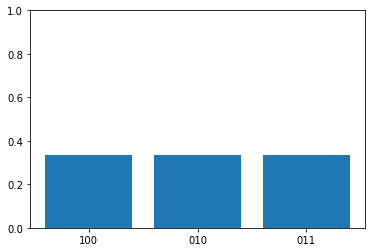

In [19]:
qaoa=QAOAChoose(CR, FR)
val, qc, job = qaoa.evaluate(np.array((0,1*np.pi/2)), backend, mu=0, useExco=[False],sv=sv,mixers=mixers,barrier=True)

print(val)

# plot histogram
md=job.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])


qc.draw()

Optimization terminated successfully.
         Current function value: 0.480839
         Iterations: 11
         Function evaluations: 22


(0.0, 1.0)

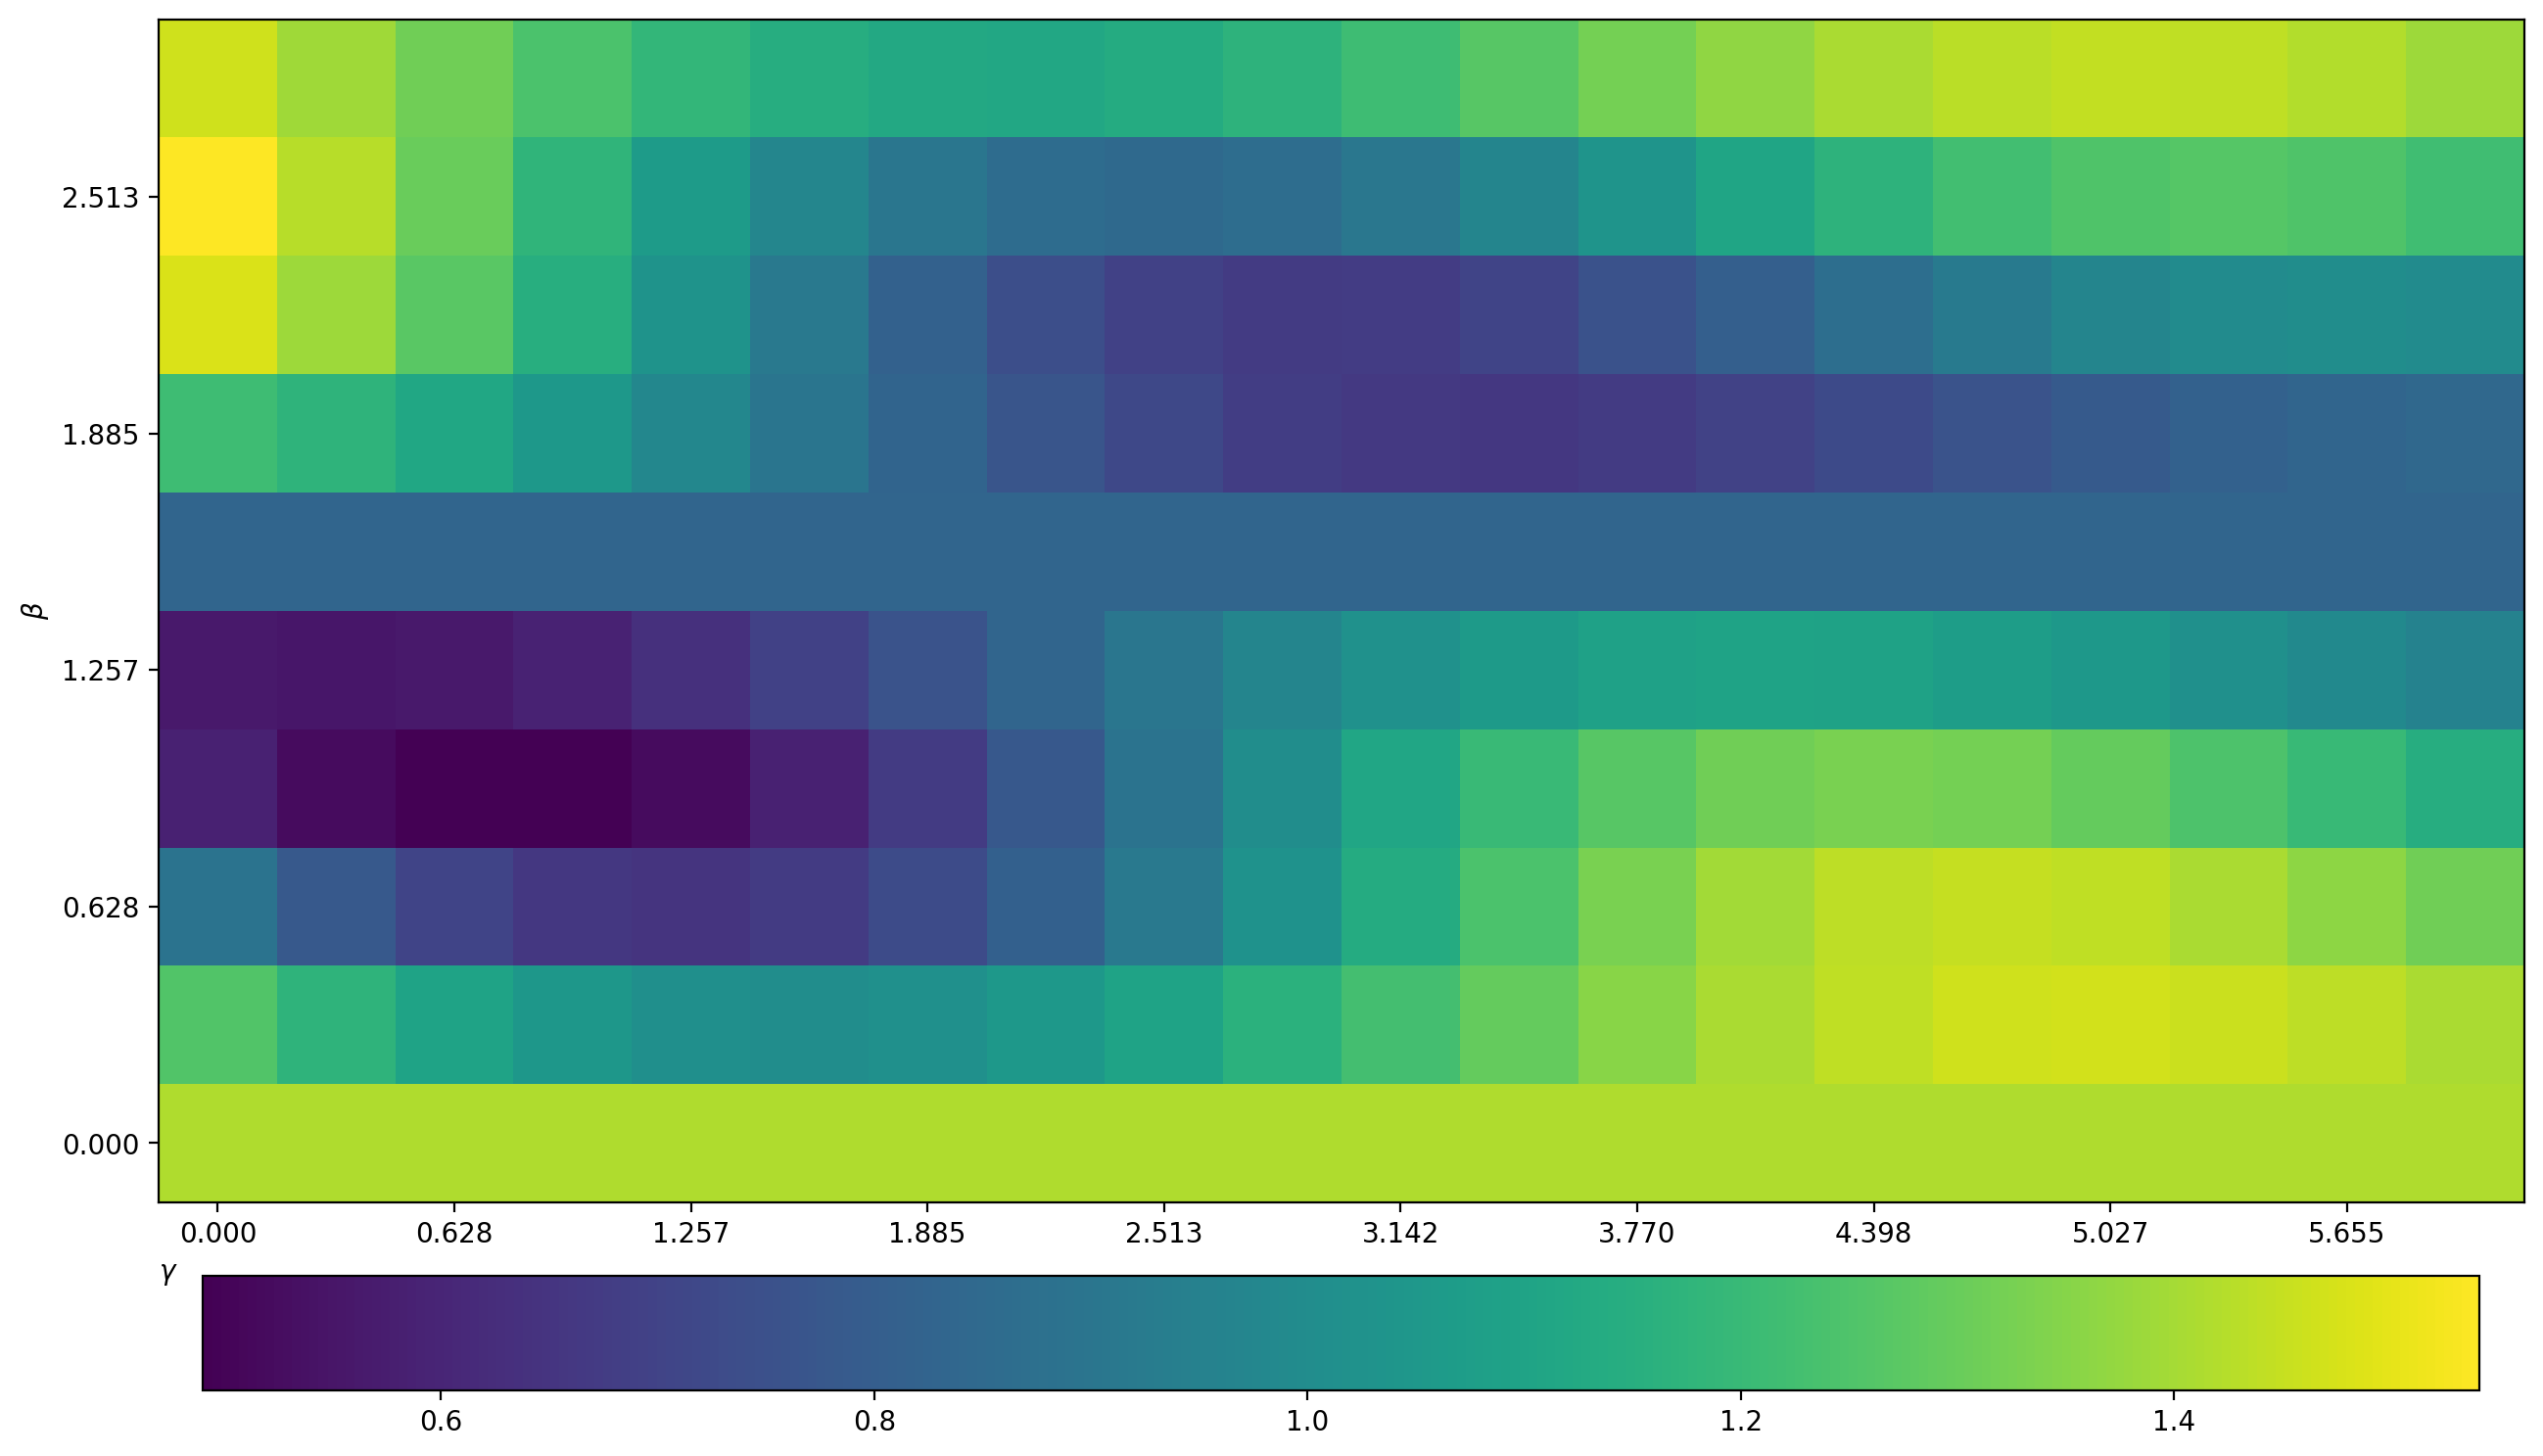

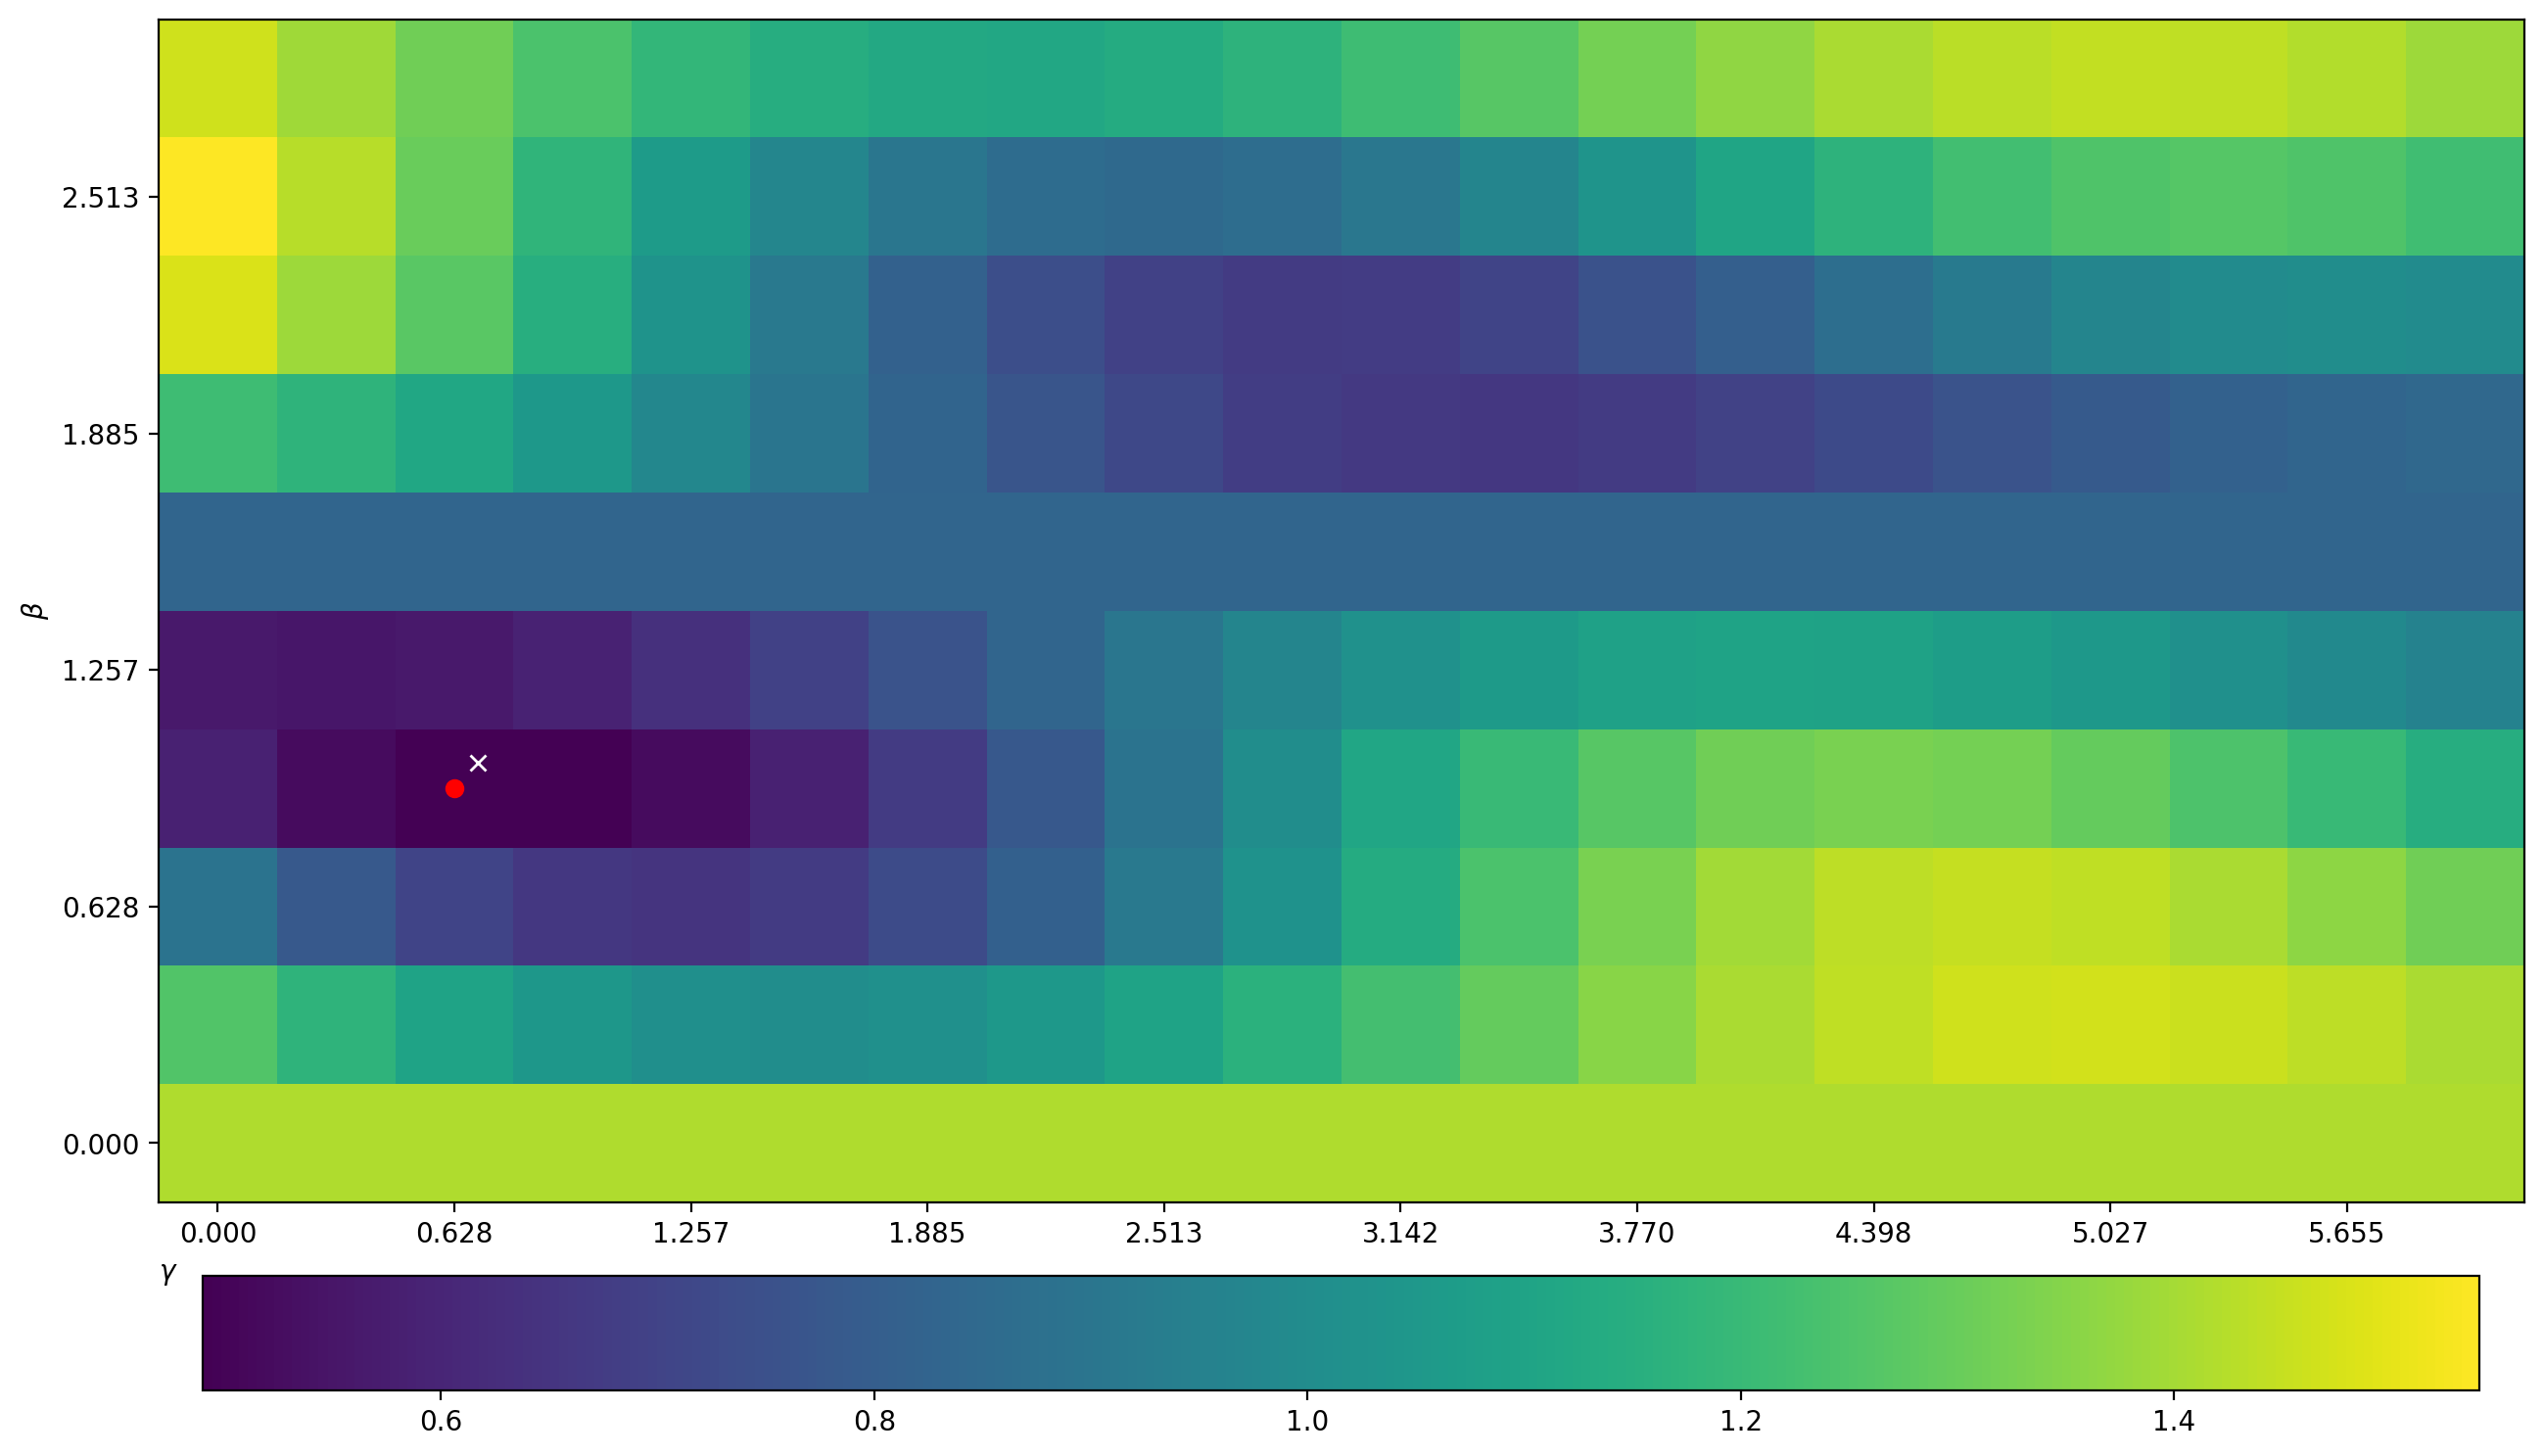

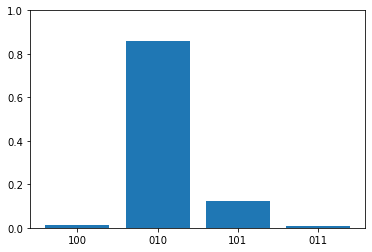

In [20]:
qaoa=QAOAChoose(CR, FR)

mu=0

E, Ecost, Eexco, x0, job, ji = qaoa.getElandscape(backend,mu,useExco=[False],sv=sv,mixers=mixers,ng=20,nb=10)
out, job_b, xb = qaoa.getlocalmin(x0, backend, mu,useExco=[False],sv=sv, mixers=mixers)

# plot landscape
_=getfig(Ecost,ng=20,nb=10)
# plot landscape
_=getfig(E,ng=20,nb=10)
pl.plot(x0[0],x0[1],'ro')
pl.plot(xb[0],xb[1],'wx')

# plot histogram
md=job_b.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])

In [56]:
sv=1./np.sqrt(3)*(eez+zze+eze).flatten()
mixers=[Mixer('001<->110', np.array((2,1,0))), Mixer('01<->10', np.array((1,0)))]

Optimization terminated successfully.
         Current function value: 0.870762
         Iterations: 14
         Function evaluations: 27


(0.0, 1.0)

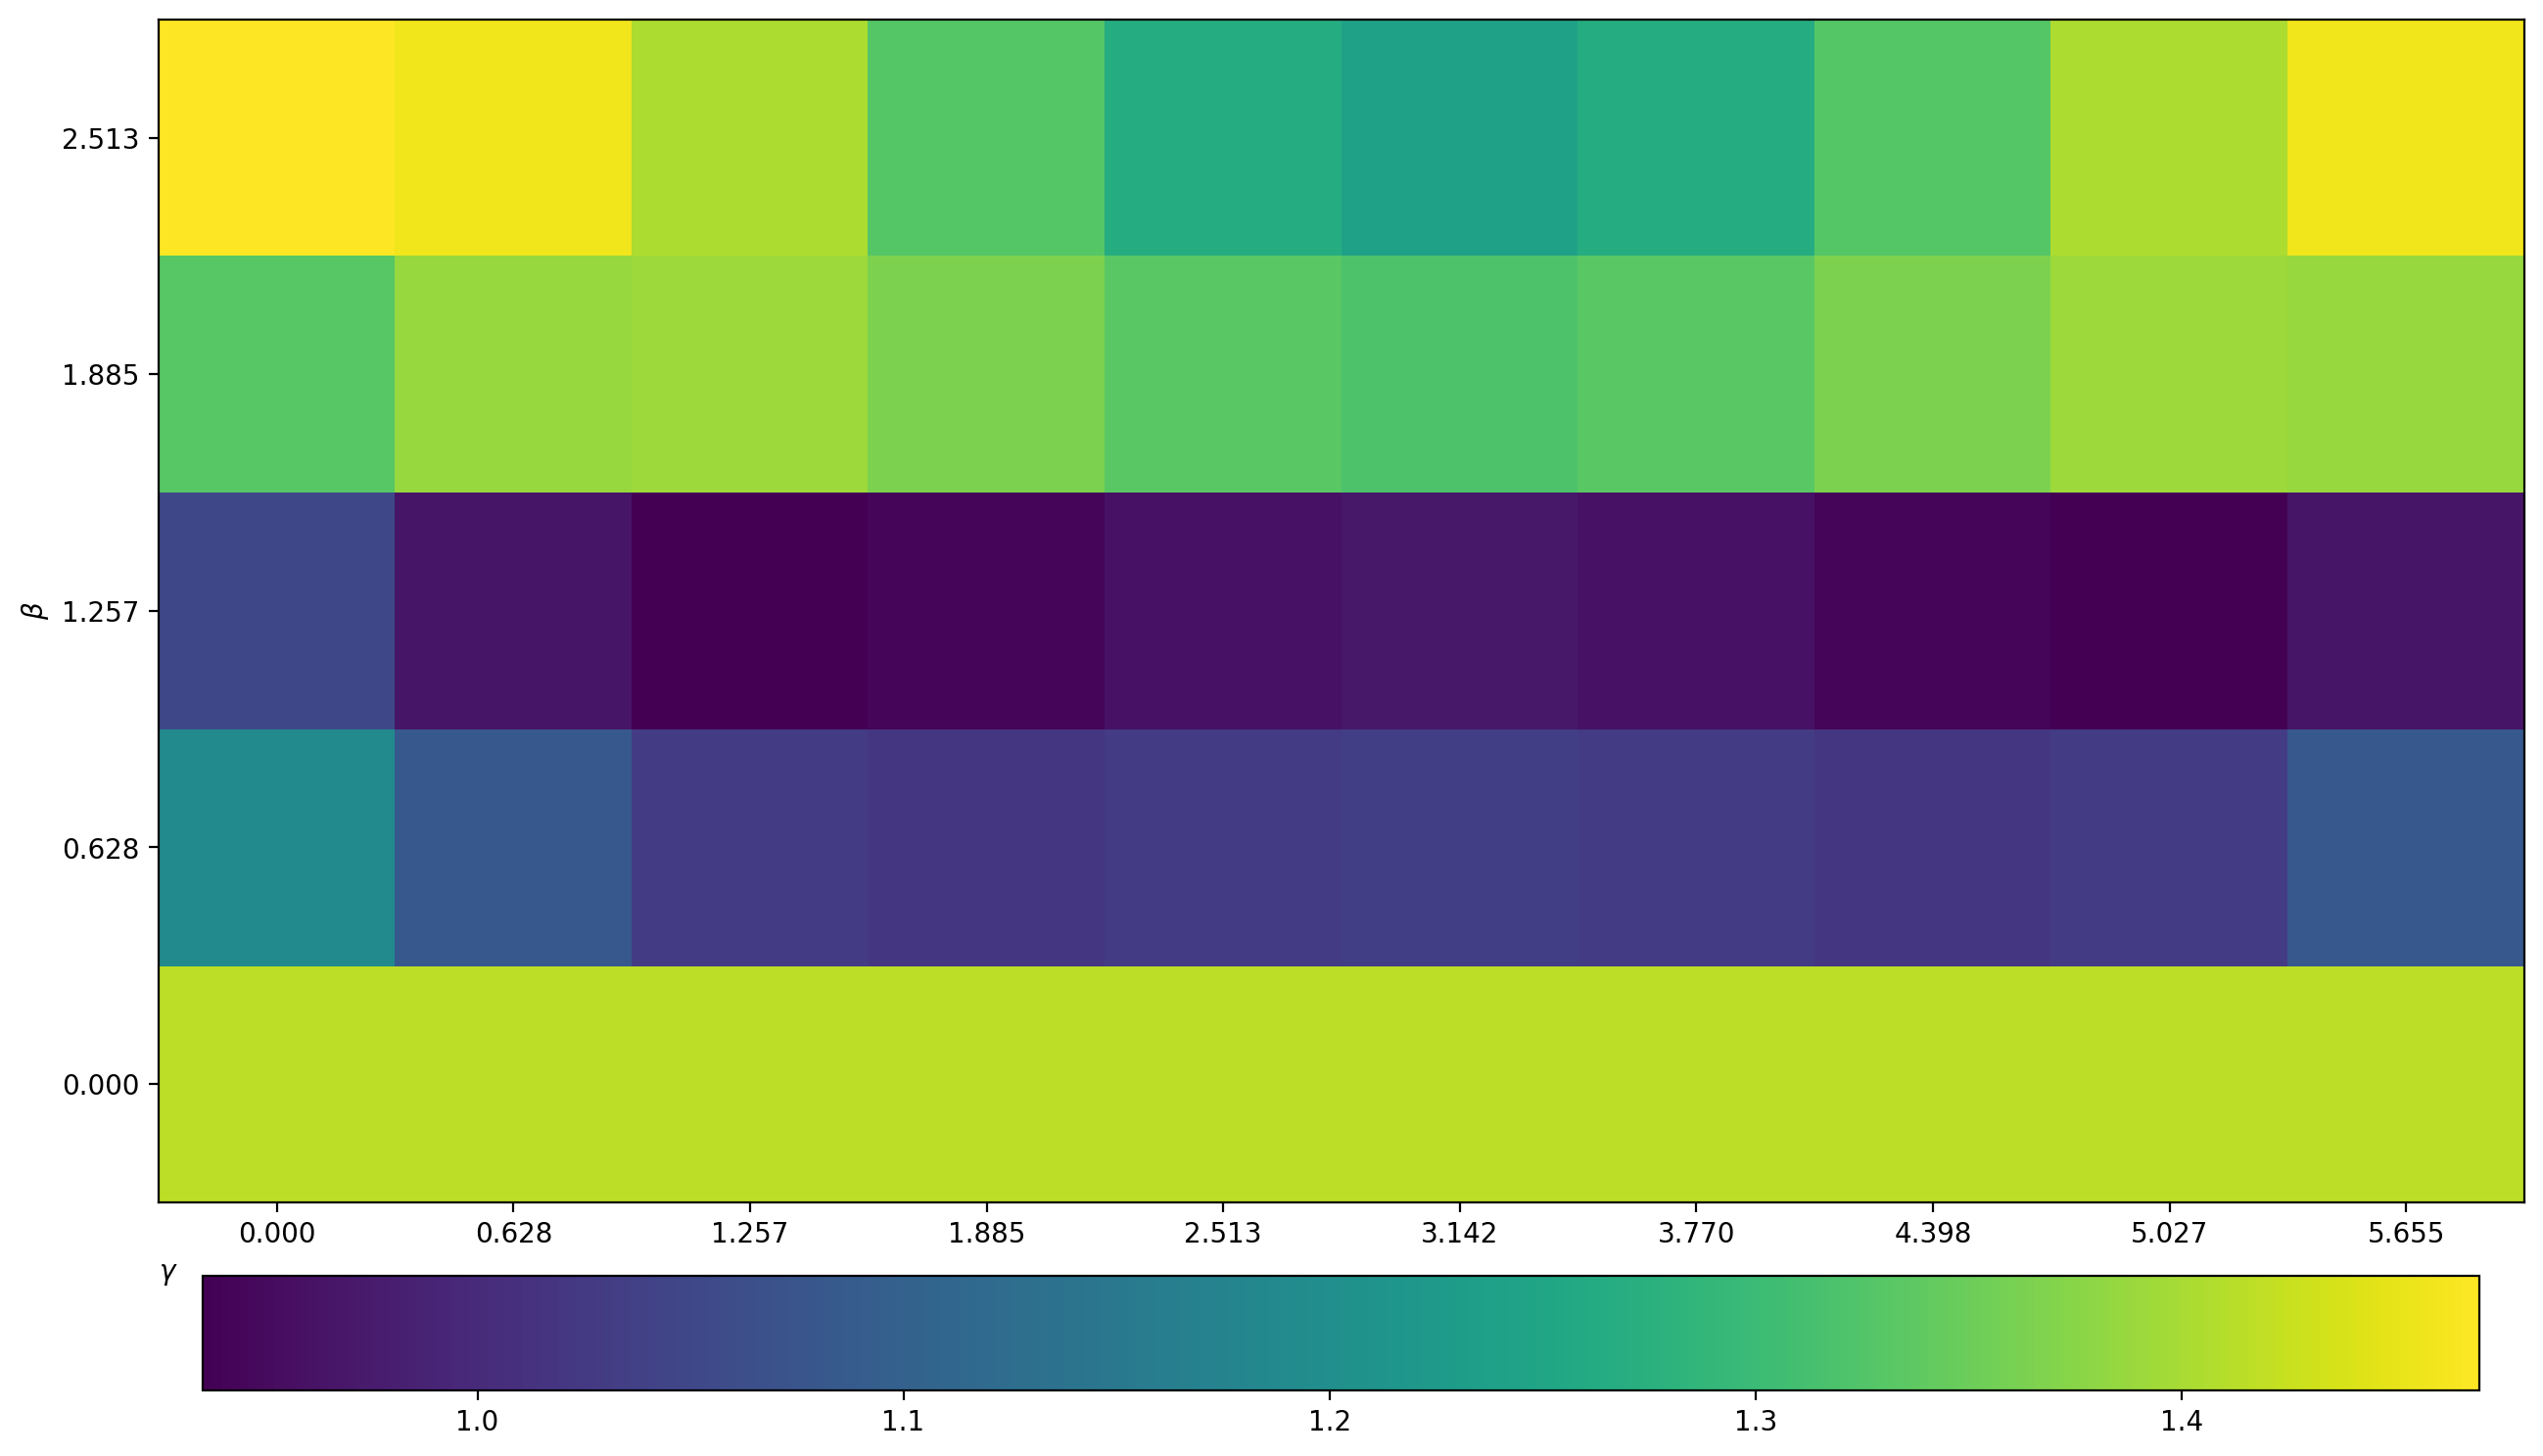

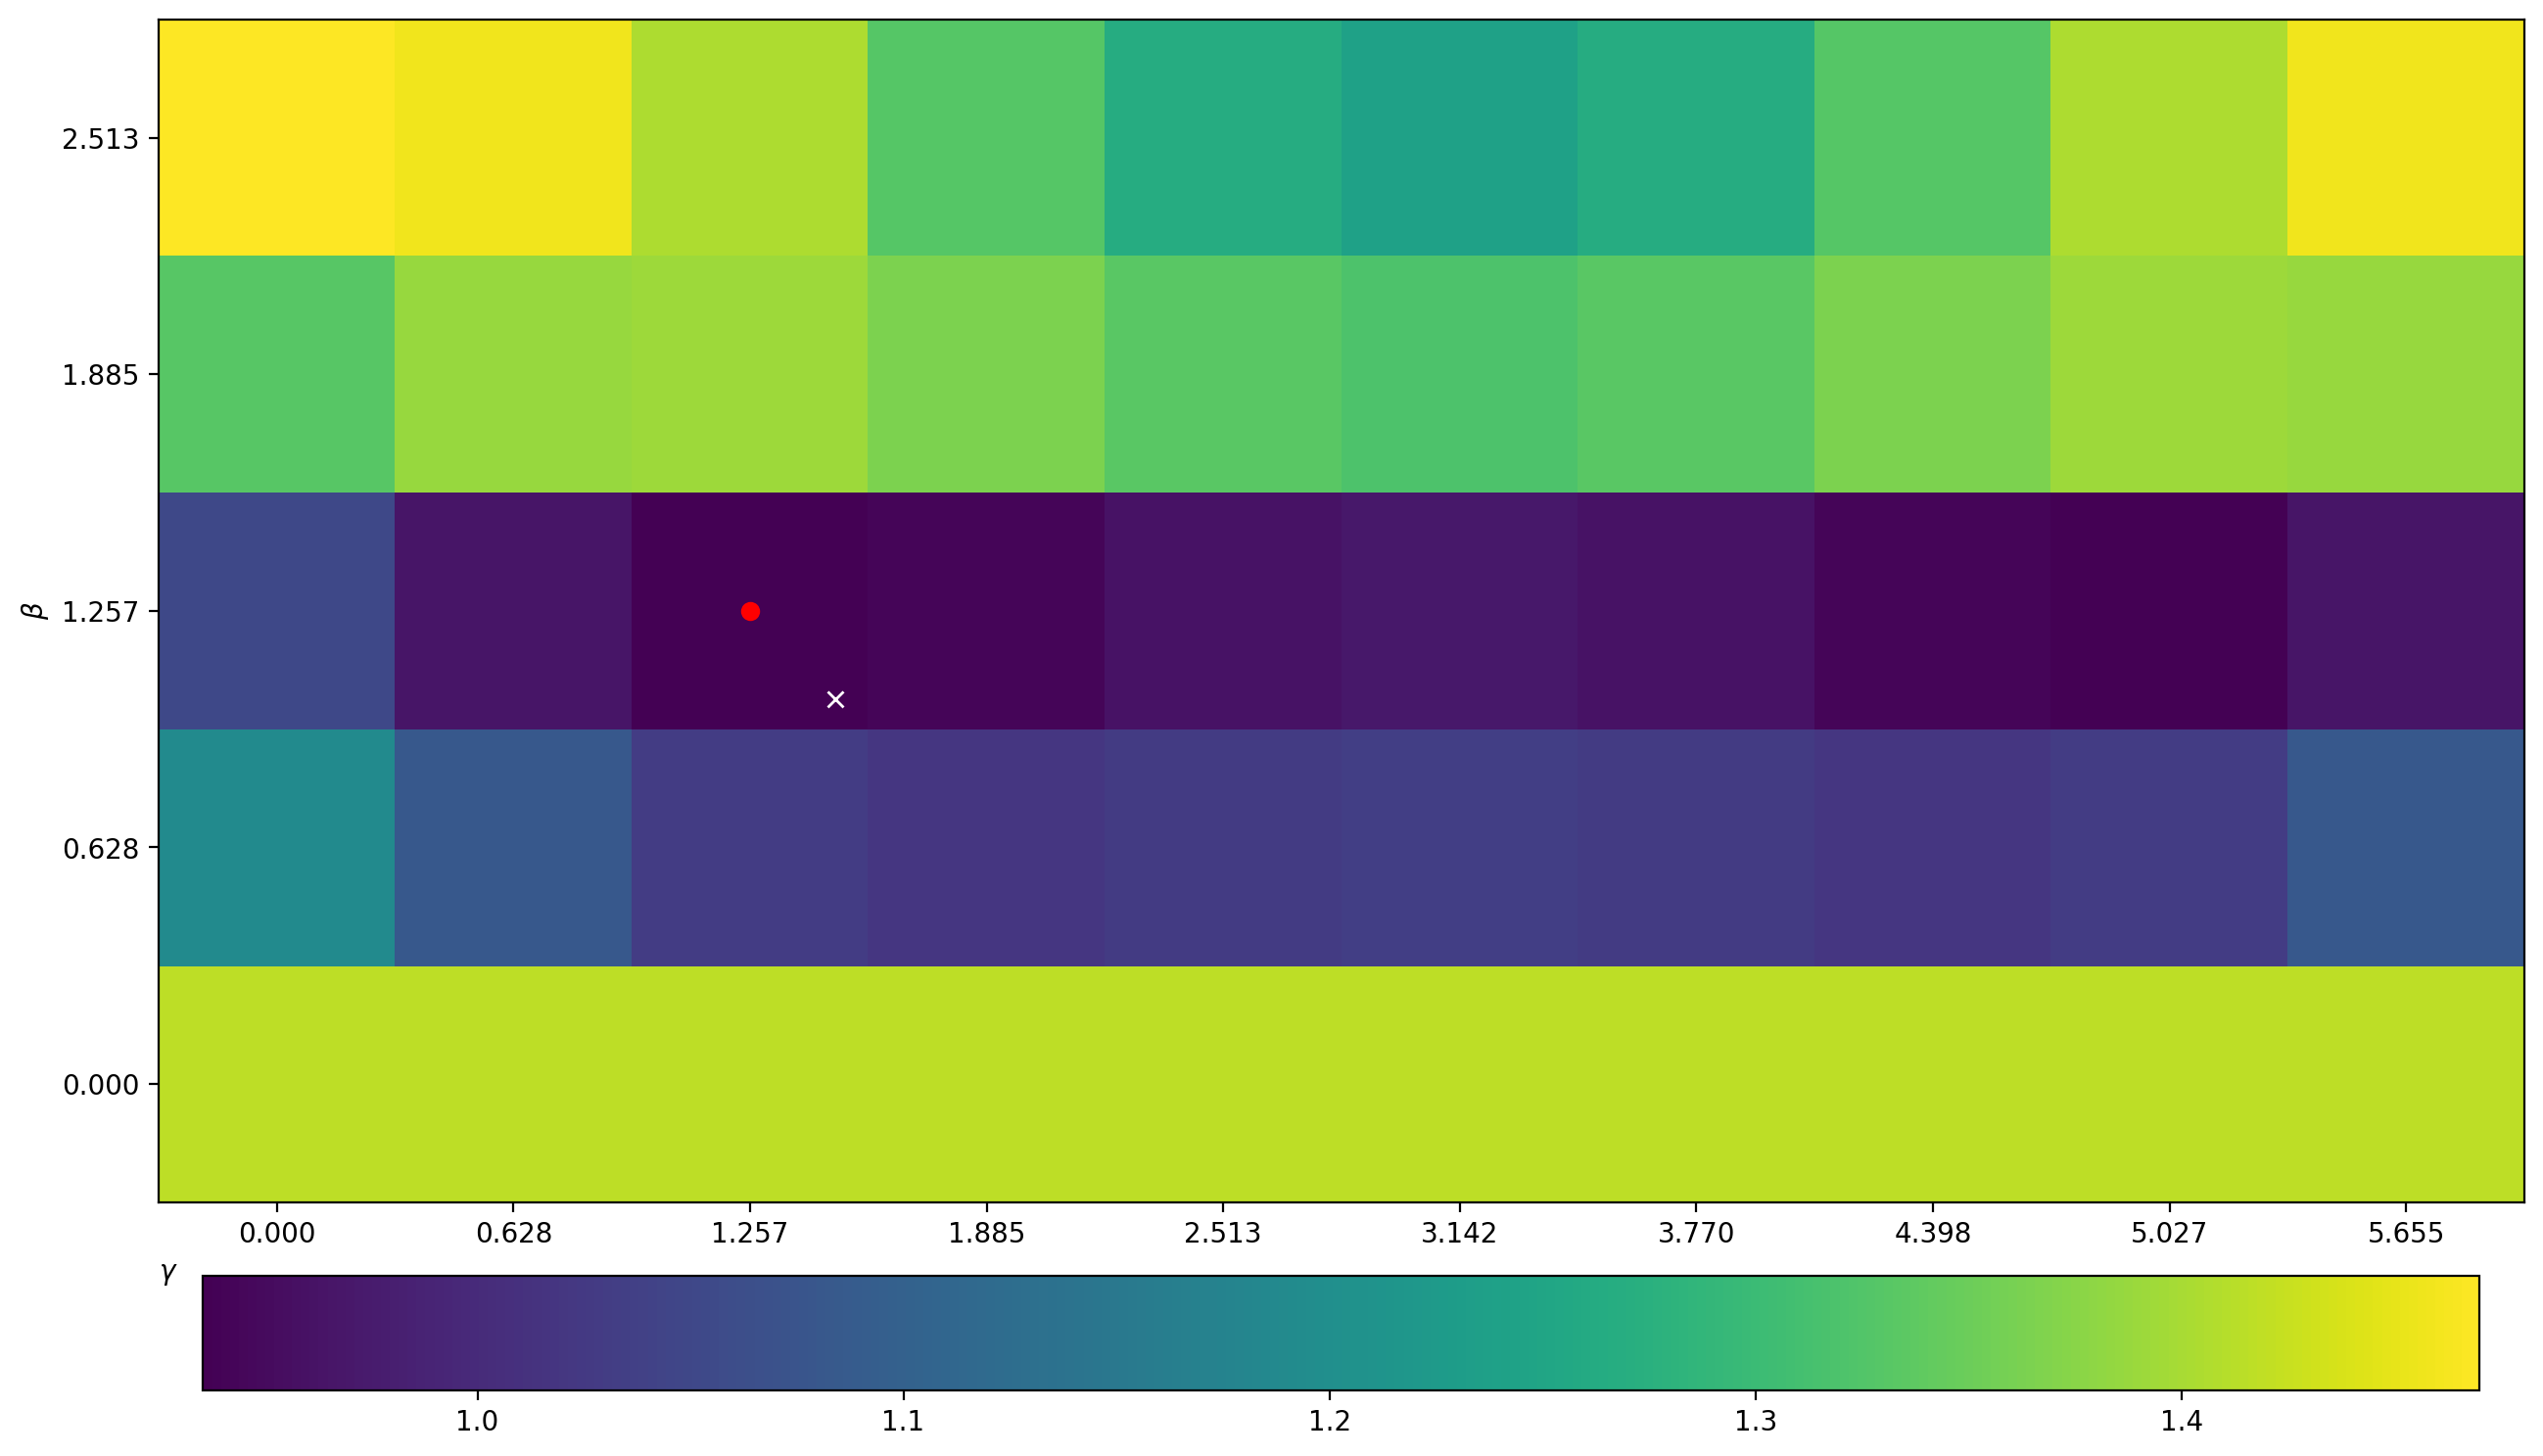

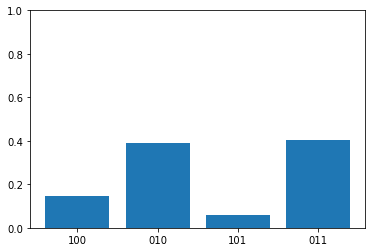

In [62]:
qaoa=QAOAChoose(CR, FR)

mu=0

E, Ecost, Eexco, x0, job, ji = qaoa.getElandscape(backend,mu,useExco=[False],sv=sv,mixers=mixers,ng=10,nb=5)
out, job_b, xb = qaoa.getlocalmin(x0, backend, mu,useExco=[False],sv=sv, mixers=mixers)

# plot landscape
_=getfig(Ecost,ng=10,nb=5)
# plot landscape
_=getfig(E,ng=10,nb=5)
pl.plot(x0[0],x0[1],'ro')
pl.plot(xb[0],xb[1],'wx')

# plot histogram
md=job_b.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])